## Capstone 2 -> Supermarket Customers

**Strategi Efektif Analisis RFM untuk mengoptimalkan potensi penjualan, mencakup rekomendasi produk yang relevan, preferensi lokasi belanja, serta evaluasi efektivitas kampanye pemasaran.**

Muhammad Iqbal - JCDS 2704

# **1. Pemahaman Bisnis**

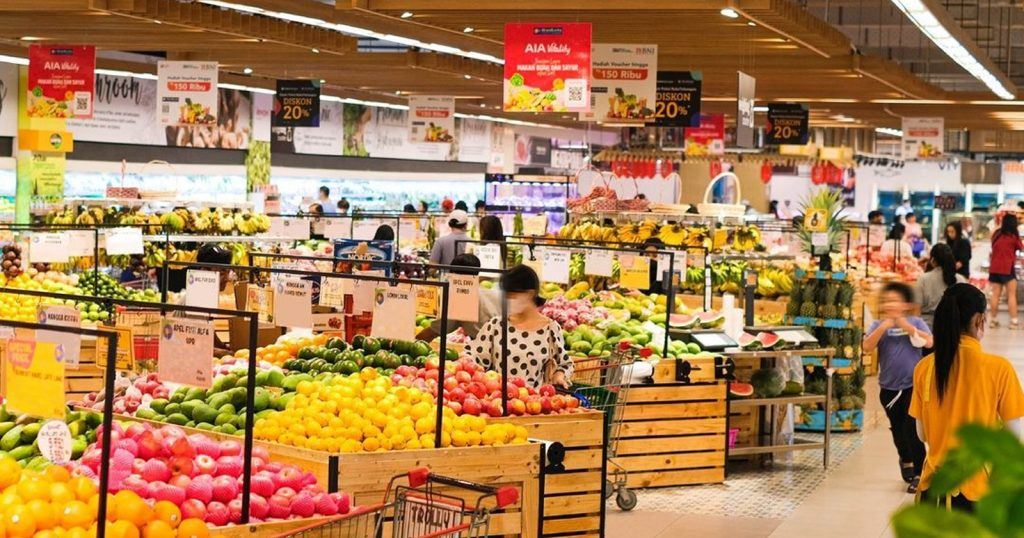

### **Pengenalan** 

Iqbal Mart adalah sebuah supermarket yang menjual berbagai jenis produk seperti Fish, Meat, Fruits, Sweet Products, Wines, dan Gold Products. Selama 2 tahun terakhir, Marketing Team melakukan campaign berupa pemberian discount vouchers kepada semua customer. Namun, setelah campaign dilakukan, justru Iqbal Mart menghadapi permasalahan *Response rate* dari marketing campaign yang dilakukan rendah yaitu sekitar **14.91%**

Supermarket menghadapi tantangan dalam memahami kebutuhan dan perilaku pelanggan yang beragam. Tanpa strategi pemasaran yang tersegmentasi, banyak peluang untuk meningkatkan loyalitas pelanggan, retensi, dan pendapatan yang terlewatkan. Analisis RFM digunakan untuk mengelompokkan pelanggan berdasarkan kebiasaan belanja mereka, sehingga memungkinkan strategi pemasaran yang lebih personal dan efektif.

Dengan segmentasi ini, Iqbal Mart dapat menciptakan strategi pemasaran yang lebih personal dan relevan, sehingga meningkatkan retensi pelanggan, mengoptimalkan pendapatan, dan mengurangi churn

### **Stakeholder**
Analisis RFM ini sangat penting bagi  stakeholder dalam perusahaan:
- **Marketing**: Memahami pola perilaku pelanggan memungkinkan tim marketing untuk mengembangkan kampanye pemasaran yang lebih efektif dan personal.


#### **Rumusan masalah**
1. Bagaimana supermarket dapat mengoptimalkan potensi penjualan dengan menganalisis pola perilaku pelanggan berdasarkan segmentasi berbasis RFM dan demografi pelanggan?

2. Apa strategi yang paling efektif untuk mengoptimalkan penjualan produk di supermarket berdasarkan pola belanja pelanggan?

3. Seberapa besar preferensi lokasi belanja pelanggan berkontribusi terhadap peningkatan pendapatan, dan bagaimana optimalisasi strategi dapat dilakukan untuk memaksimalkan potensi ini?

4. Bagaimana efektivitas kampanye pemasaran dapat ditingkatkan melalui penerapan strategi yang disesuaikan dengan segmentasi pelanggan?

#### **Goals**:

Meningkatkan pendapatan supermarket melalui analisis pola belanja berbasis segmentasi RFM, mencakup rekomendasi produk yang relevan, preferensi lokasi belanja, serta efektivitas kampanye pemasaran.

# **2. Pemahaman Data**

## 2.1 Deskripsi Data

**People**

|Column Name (People)| Description|
|----------|------------|
|ID | Customer's unique identifier|
|Year_Birth | Customer's birth year|
|Education | Customer Education Level|
|Marital_Status | Customer's marital status|
|Income | Customer's yearly household income|
|Kidhome | Number of children in customer's household|
|Teenhome | Number of teenagers in customer's household|
|Dt_Customer | Date of customer's enrollment with the company|
|Recency | Number of days since customer's last purchase|
|Complain | 1 if the customer complained in the last 2 years, 0 otherwise|

**Products**

|Column Name (Product)| Description|
|----------|------------|
|MntWines | Amount spent on wine in last 2 years|
|MntFruits | Amount spent on fruits in last 2 years|
|MntMeatProducts | Amount spent on meat in last 2 years|
|MntFishProducts | Amount spent on fish in last 2 years|
|MntSweetProducts | Amount spent on sweets in last 2 years|
|MntGoldProds | Amount spent on gold in last 2 years| 

**Promotion**

|Column Name (Promotion)| Description|
|----------|------------|
|NumDealsPurchases | Number of purchases made with a discount|
|AcceptedCmp1 | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2 | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3 | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4 | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise|
|AcceptedCmp5 | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise|
|Response | 1 if the customer accepted the offer in the last campaign, 0 otherwise|


**Place**

|Column Name (Place)| Description|
|----------|------------|
|NumWebPurchases | Number of purchases made through the company’s website|
|NumCatalogPurchases | Number of purchases made using a catalog|
|NumStorePurchases | Number of purchases made directly in stores|
|NumWebVisitsMonth | Number of visits to the company’s website in the last month|

## 2.2 Data Prepocessing

**Import Library**

In [1]:
# import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Supermarket Customers.csv', sep = "\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- kolom `Dt_Customer` masih bertype object dan perlu diubah menjadi type data `DateTime` 

In [4]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- terdapat missing value pada data Income sejumlah 24 data, dan harus dilakukan handling missing value 

In [5]:

def unique_data(df):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique Values'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

,Columns,Unique Count,Unique Values
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


`insight`

dapat kita lihat ada beberapa kolom yang mengandung informasi kurang tepat dan dapat menjadi salah penafsiran, seperti:
1. `Education`
memiliki *unique value* `2n Cycle` yang memiliki definisi sama dengan `Master`

2. `Marital status`
memiliki *unique value* `Absurd, YOLO` yang tidak memiliki hubungan dengan kolom Marital status, dan perlu di drop

3. `Z_CostContact` dan `Z_CostContact`
tidak memiliki hubungan dengan kolom lain, jadi perlu di drop saja

In [6]:
stats_descriptive = df.drop(columns=["ID"]).describe()
stats_descriptive

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


`insight`

1. `Year_Birth` :
pelanggan dengan usia > 100 tahun dalam kolom `Year_birth` dianggap kesalahan dan perlu validasi terlebih dahulu

2. `Income` :
pelanggan dengan income 666666  dalam kolom `Income` dianggap kesalahan dan perlu validasi terlebih dahulu


In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


- Validasi kembali apakah `Dt_customer` sudah menjadi tipe data datetime

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## 2.3 Data Cleaning

In [10]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [11]:
df = df.drop(df[(df['Marital_Status'] == 'Absurd') | (df['Marital_Status'] == 'YOLO')].index)
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

In [12]:
# Mengganti kategori 'Together' menjadi 'Married'
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

In [13]:
# Membuat kolom Marital Status menjadi 2 kategori Partner and Alone
df['Marital_Status'] = df['Marital_Status'].replace([ 'Single','Divorced', 'Widow'],'Alone')

df['Marital_Status'] = df['Marital_Status'].replace(['Married'],'Partner')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Alone,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Alone,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Partner,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Partner,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Alone,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Partner,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [14]:
df['Marital_Status'].value_counts()

Marital_Status
Partner    1444
Alone       792
Name: count, dtype: int64

In [15]:
df['Education'].value_counts()

Education
Graduation    1126
PhD            484
Master         369
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [16]:
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Alone,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Alone,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Partner,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Partner,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Alone,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Partner,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [17]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis= 1, inplace = True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Alone,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Alone,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Partner,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Partner,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Alone,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Partner,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


1. ` Marital Status` : Mengubah Marital_Status menjadi  2 saja yaitu `Partner` dan `Alone`
- `Alone` -> `Widow`, `Single`, `Divorced`
- `Partner` -> `Married`

2. `Education` : Mengubah  kolom Education menjadi 4 saja, yaitu `Basic`, `Graduation`, `Master`, `PHD`
- mengganti kolom `2n cycle` menjadi `Master

3. `Z_CostContact` dan `Z_Revenue` : menghapus kedua kolom tersebut karena tidak ada keterkaitan dengan kolom lain

## 2.4 Feature Engineering

In [18]:
#Membuat kolom banyak anak 
df['Children'] = df['Kidhome'] + df['Teenhome']

In [19]:
df['Children'].value_counts()

Children
1    1126
0     636
2     421
3      53
Name: count, dtype: int64

In [20]:
df['Age']=(df['Dt_Customer'].dt.year-df['Year_Birth'])

In [21]:
sorted_years = np.sort(df['Year_Birth'].unique())
sorted_years

array([1893, 1899, 1900, 1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996])

In [22]:
def generation(year_birth):
    if year_birth >= 1925 and year_birth <= 1945:
        return "Silent Generation"
    elif year_birth >= 1946 and year_birth <= 1964:
        return "Boomers"
    elif year_birth >= 1965 and year_birth <= 1979:
        return "Gen X"
    elif year_birth >= 1980 and year_birth <= 1994:
        return "Millennials"
    else:
        return "Gen Z"
    
df["Generation"] = df["Year_Birth"].apply(generation)
df[["Year_Birth", "Generation"]].head()

,Year_Birth,Generation
0,1957,Boomers
1,1954,Boomers
2,1965,Gen X
3,1984,Millennials
4,1981,Millennials


In [23]:
df['Generation'].value_counts()

Generation
Gen X                1028
Boomers               758
Millennials           416
Silent Generation      24
Gen Z                  10
Name: count, dtype: int64

https://libguides.usc.edu/busdem/age#:~:text=The%20Baby%20Boomer%20Generation%20%E2%80%93%20born,Z%20%E2%80%93%20born%201995%2D2012.

In [24]:
def social_class(income):
    if income <= 41641:
        return "Lower Class"
    elif income >= 41642 and income <= 124923:
        return "Middle Class"
    else:
        return "Upper Class"
    
df["Social_Class"] = df["Income"].apply(social_class)
df[["Income", "Social_Class"]].head()

,Income,Social_Class
0,58138.0,Middle Class
1,46344.0,Middle Class
2,71613.0,Middle Class
3,26646.0,Lower Class
4,58293.0,Middle Class


In [25]:
df['Social_Class'].value_counts()

Social_Class
Middle Class    1421
Lower Class      783
Upper Class       32
Name: count, dtype: int64

https://www.pewresearch.org/social-trends/2016/05/11/1-the-american-middle-class-loses-ground-nationally/#:~:text=Urban%20Honolulu%2C%20HI%2C%20was%20one,income%20and%20middle%20income%20rise.

`Insight`

1. `Children` : kolom yang berisi informasi jumlah anak yang dimiliki pelanggan, kolom ini adalah penambahan kolom anak (`Kidhome`)  dan   remaja (`Teenhome`)

2. `Age` : kolom yang berisi informasi mengenai usia pelanggan, kolom ini adalah selisih  transaksi pelanggan (`Dt_Customer`) dengan tahun lahir pelanggan (`Year_Birth`)

3. `Generation` : kolom yang berisi informasi perbedaan generasi tiap pelanggan
- The Silent Generation – born 1925-1945.
- The Baby Boomer Generation – born 1946-1964.
- Generation X – born 1965-1979.
- Millennials – born 1980-1994.
- Generation Z – born 1995-2012.

4. `Social_Class` : kolom yang berisi informasi  pembagian Tingkatan Sosial Ekonomi
- **Lower Class**: Below $41,641
- **Middle Clas**: Between $41,642 - $124,923
- **Upper Class**: $124,924 or higher

## 2.5 Duplicate Data

In [26]:
df.duplicated().sum()

np.int64(0)

setelah dilakukan cek duplikasi data, tidak ditemukan data duplikat

## 2.6 Uji Normalitas Data

In [27]:
df_numerik = [ 'Year_Birth', 'Income', 'Recency','MntWines',
'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
'MntGoldProds',  'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases',
'NumStorePurchases', 'NumWebVisitsMonth']

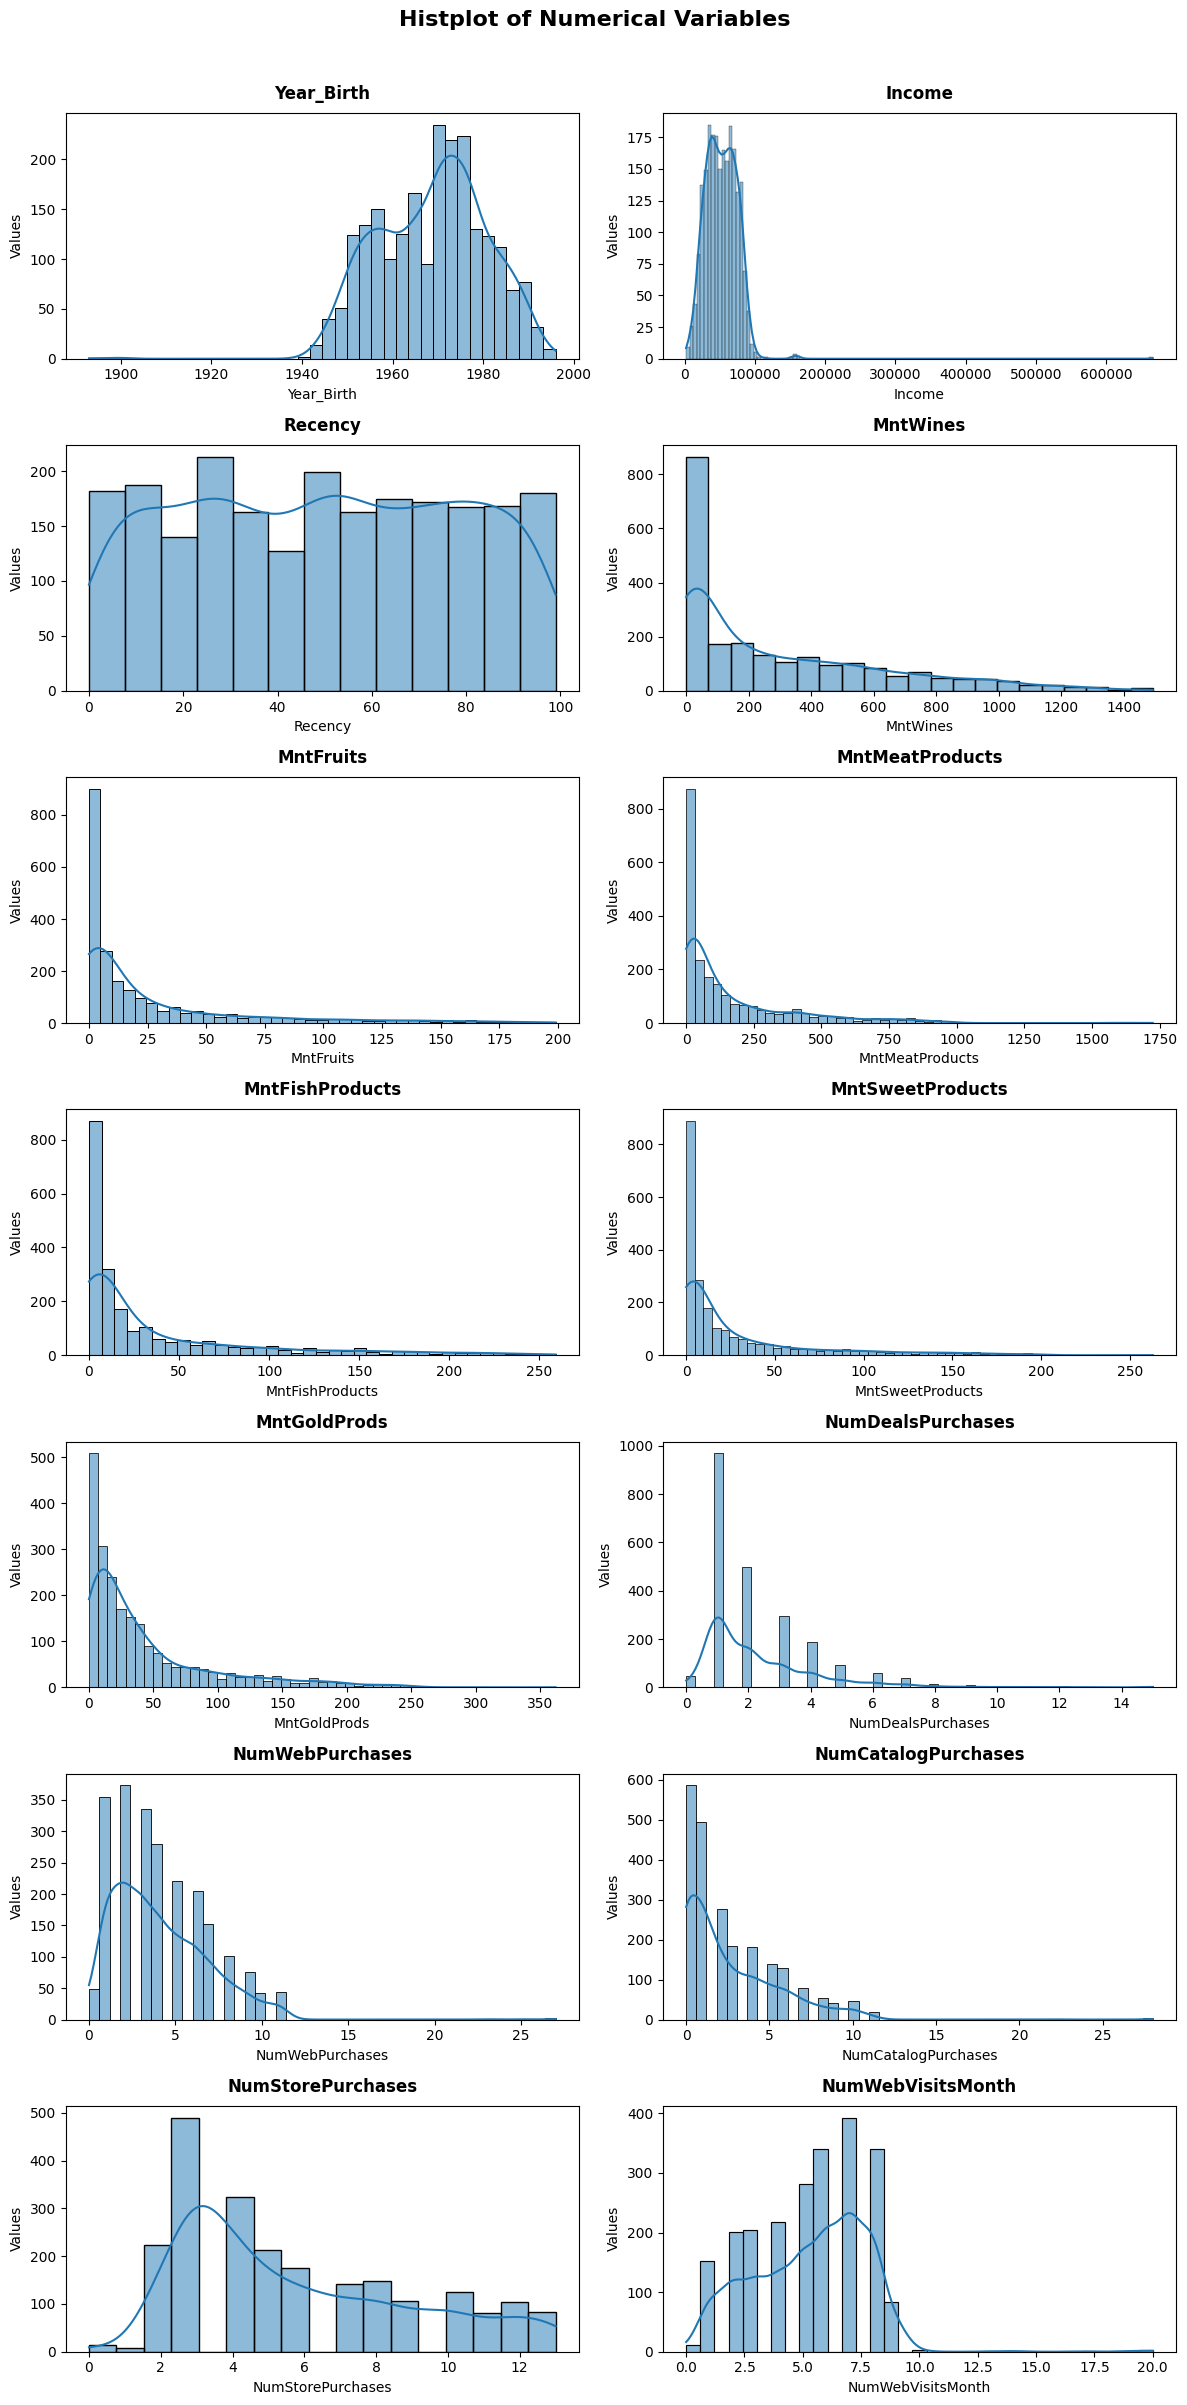

In [28]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12,25))

axes = axes.flatten()

for i, col in enumerate(df_numerik):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

plt.suptitle('Histplot of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

In [29]:
from scipy.stats import shapiro

for column in  df_numerik:
    stat,p = shapiro(df[column].dropna())
    alpha = 0.05
    if p > alpha:
        print(f"Kolom '{column}' terdistribusi normal (p-value: {p:.4f})")
    else:
        print(f"Kolom '{column}' tidak terdistribusi normal (p-value: {p:.4f})")

Kolom 'Year_Birth' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'Income' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'Recency' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'MntWines' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'MntFruits' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'MntMeatProducts' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'MntFishProducts' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'MntSweetProducts' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'MntGoldProds' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'NumDealsPurchases' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'NumWebPurchases' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'NumCatalogPurchases' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'NumStorePurchases' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'NumWebVisitsMonth' tidak terdistribusi normal (p-value: 0.0000)


- setelah dilakukan `uji Normal test` pada data numerik, diketahui bahwa semua kolom numerik tidak terdistribusi normal

## 2.7 Handling Outliers

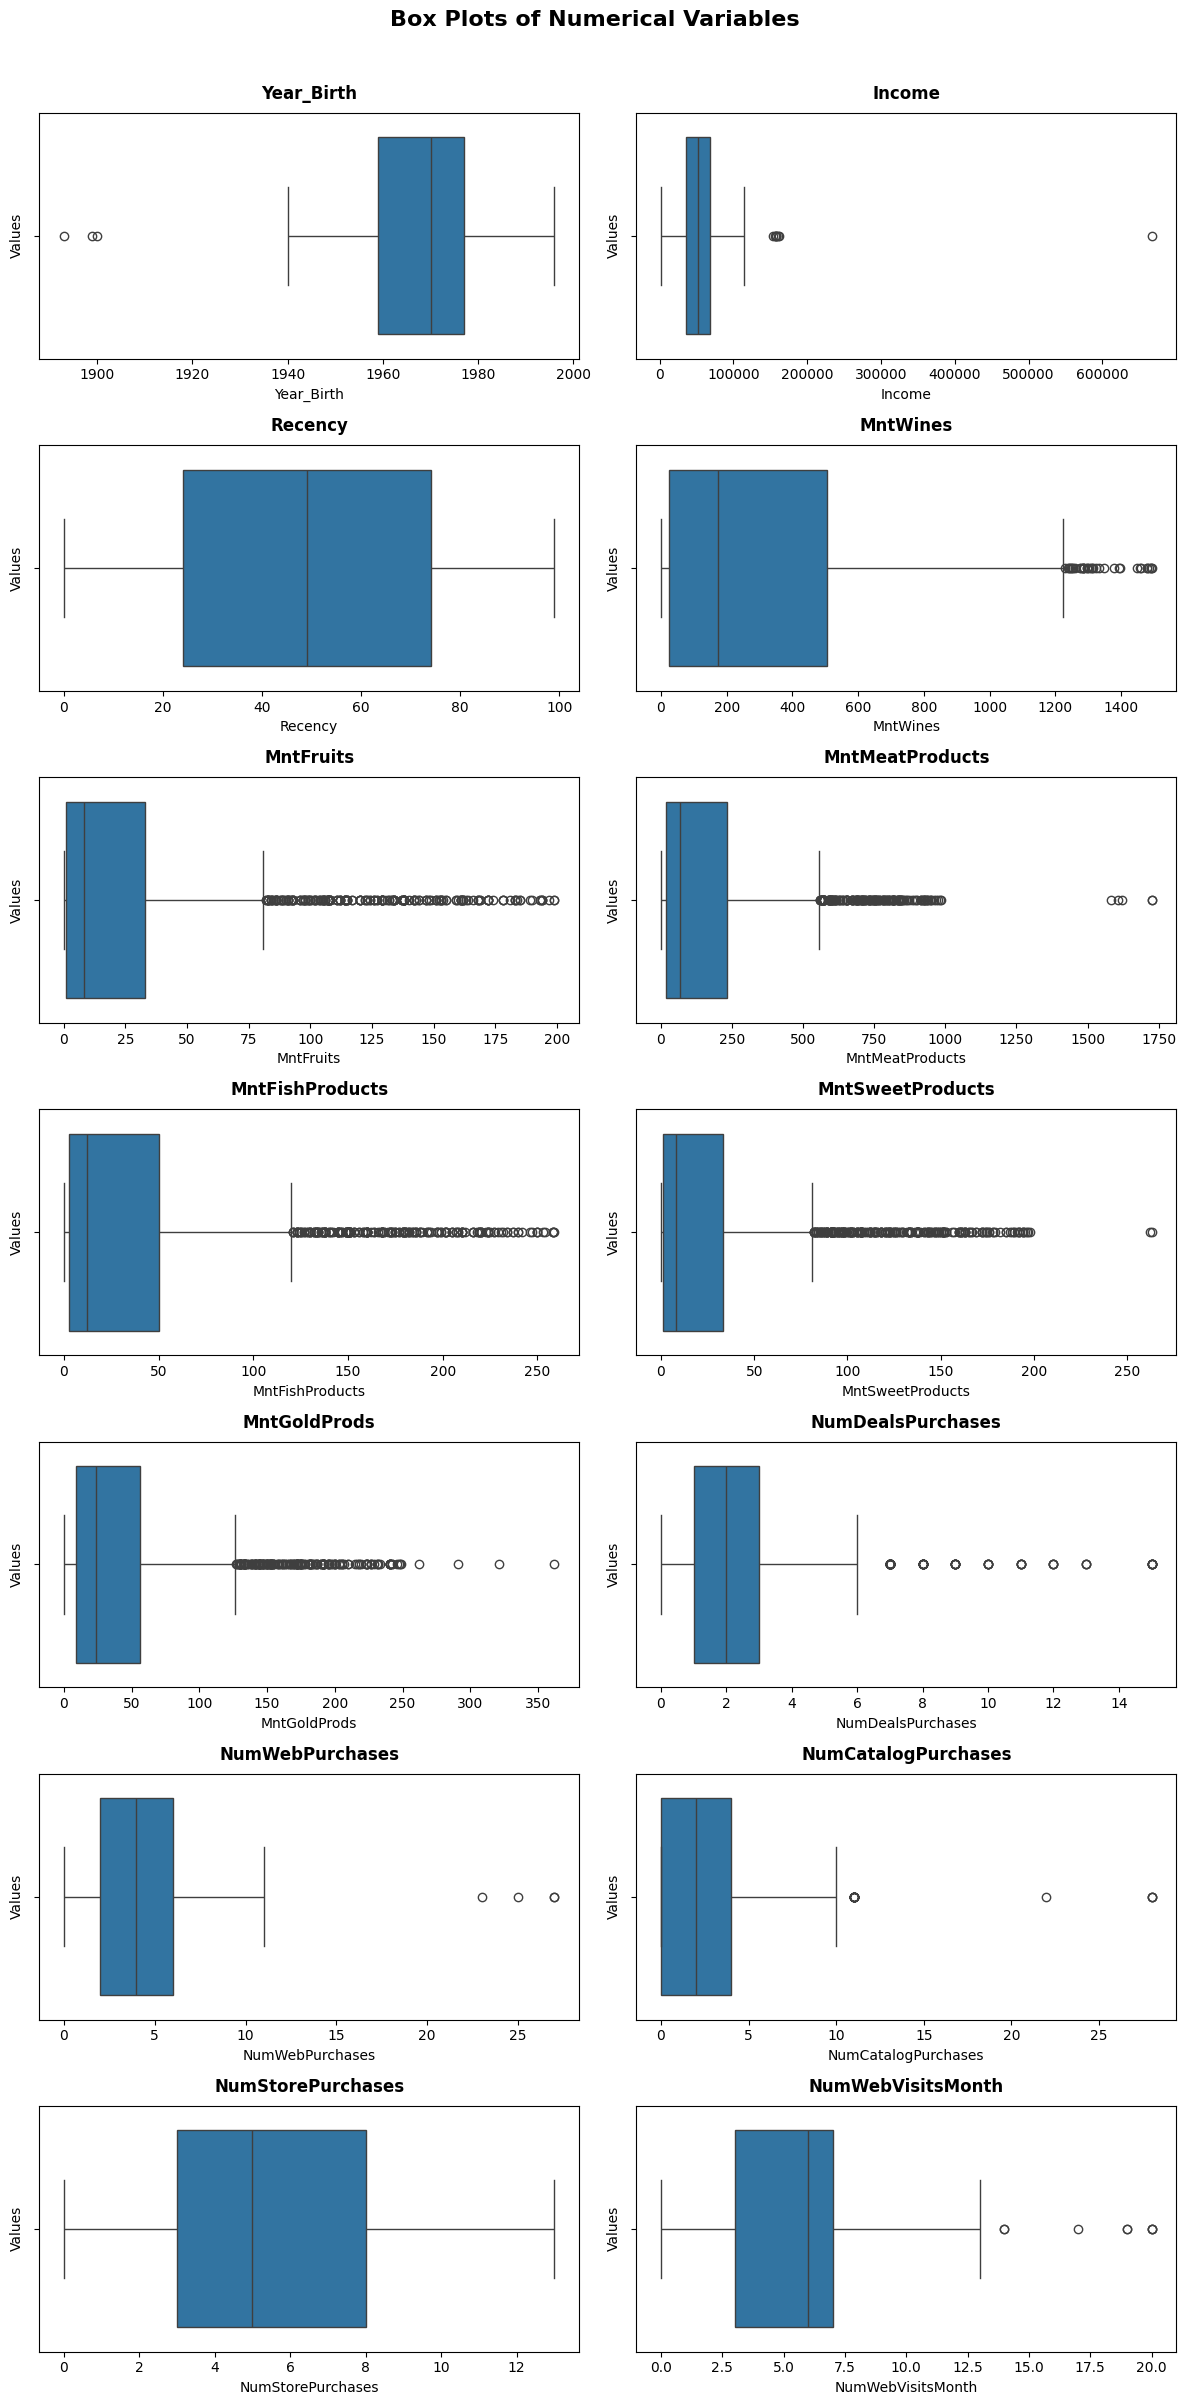

In [30]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12,25))

axes = axes.flatten()

for i, col in enumerate(df_numerik):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

plt.suptitle('Box Plots of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

In [31]:
data_kurang_1900 = df[df['Year_Birth'] < 1940]
data_kurang_1900

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Generation,Social_Class
192,7829,1900,Master,Alone,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,1,0,1,113,Gen Z,Lower Class
239,11004,1893,Master,Alone,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,1,121,Gen Z,Middle Class
339,1150,1899,PhD,Partner,83532.0,0,0,2013-09-26,36,755,...,0,1,0,0,0,0,0,114,Gen Z,Middle Class


In [32]:
income_tinggi = df[df['Income'] > 600000]
income_tinggi

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Generation,Social_Class
2233,9432,1977,Graduation,Partner,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,0,1,36,Gen X,Upper Class


In [33]:
print(f"Jumlah data sebelum handling outliers: {len(df)}")

# Handling outliers (Year_Birth)
df = df[df["Year_Birth"] > 1900]
print(f"Jumlah data setelah handling outliers (Year_Birth): {len(df)}")

# Handling outliers (Income)
df = df[~(df["Income"] > 600000)]
print(f"Jumlah data setelah handling outliers (Income): {len(df)}")

Jumlah data sebelum handling outliers: 2236
Jumlah data setelah handling outliers (Year_Birth): 2233
Jumlah data setelah handling outliers (Income): 2232


Setelah dilakukan Handling outliers, diketahui bahwa terdapat beberapa outlier pada kolom:

1. `Year_Birth` : terdapat data outlier pelanggan yang lahir pada tahun 1900 bahkan ada dibawah 1900. jika dihitung selisih dengan tanggal transaksi maka usia pelanggan berumur 100 tahun, dan ini perlu di drop karena menimbulkan kesalahan dalam analisis. 

2. `Income` : didapatkan ada pelanggan dengan income 666,666$ diatas rata-rata dengan pelanggan keseluruhan, data tersebut harus di drop untuk menghindari kesalahan dalam analisis, karena sudah termasuk extrem outlier nilai yang berada sangat jauh dari rata-rata pelanggan

## 2.8 Handling Missing Value

In [34]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Children                0
Age                     0
Generation              0
Social_Class            0
dtype: int64

In [35]:
df.groupby('Education')[['Income']].median()

,Income
Education,
Basic,20744.0
Graduation,51965.5
Master,49588.5
PhD,55212.0


In [36]:
df["Income"] = df["Income"].fillna(df.groupby("Education")["Income"].transform("median"))

In [37]:
df["Income"].isna().sum()

np.int64(0)

Terdapat missing pada kolom Income sebanyak 24 baris, jadi kita mengisi baris tersebut dengan median berdasarkan Income tiap Education

# 3. Data Analysis

## 3.1 Segmentasi berbasis RFM

In [38]:
# Menghitung nilai RFM
# Recency sudah tersedia
df['recency'] = df['Recency']

# Frequency: Total pembelian dari berbagai kanal
df['frequency'] = (df['NumWebPurchases'] + 
                    df['NumCatalogPurchases'] + 
                    df['NumStorePurchases'])

# Monetary: Total belanja pada semua kategori produk
df['monetary'] = (df['MntWines'] + 
                    df['MntFruits'] + 
                    df['MntMeatProducts'] + 
                    df['MntFishProducts'] + 
                    df['MntSweetProducts'] + 
                    df['MntGoldProds'])

# Menampilkan hasil
rfm = df[['ID', 'recency', 'frequency', 'monetary']]
rfm.head()


,ID,recency,frequency,monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422


In [39]:
rfm['R_Score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [40]:
rfm['RFM_Score'] = rfm.R_Score.astype(str) + rfm.F_Score.astype(str) + rfm.M_Score.astype(str)
rfm

,ID,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score
0,5524,58,22,1617,3,5,5,355
1,2174,38,4,27,4,1,1,411
2,4141,26,20,776,4,4,4,444
3,6182,26,6,53,4,2,1,421
4,5324,94,14,422,1,3,3,133
...,...,...,...,...,...,...,...,...
2235,10870,46,16,1341,3,4,5,345
2236,4001,56,15,444,3,4,3,343
2237,7270,91,18,1241,1,4,5,145
2238,8235,8,21,843,5,5,4,554


In [41]:
# Create customer segments based on RFM score
Champion = [555, 554, 544, 545, 454, 455, 445]
Loyal_Customer = [543, 444, 435, 355, 354, 345, 344, 335]
Potential_Loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
New_Customer = [512, 511, 422, 421, 412, 411, 311]
Promising = [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]
Need_Attention = [535, 534, 443, 434, 343, 334, 325, 324]
Cannot_Lose_Them = [155, 154, 144, 214,215,115, 114, 113]
About_to_Sleep = [331, 321, 312, 221, 213]
At_Risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
Hibernating = [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]
Lost = [111, 112, 121, 131, 141, 151]

# Create a function to assign customers to various customer segments based on RFM score
def assign_cust_seg(col):
    list_col = list(col)
    segment = list()
    for score in list_col:
        if score in Champion:
            value = 'Champion'
        elif score in Loyal_Customer:
            value = 'Loyal Customer'
        elif score in Potential_Loyalist:
            value = 'Potential Loyalist'
        elif score in New_Customer:
            value = 'New Customer'
        elif score in Promising:
            value = 'Promising'
        elif score in Need_Attention:
            value = 'Need Attention'
        elif score in Cannot_Lose_Them:
            value = 'Cannot Lose Them'
        elif score in About_to_Sleep:
            value = 'About to Sleep'
        elif score in At_Risk:
            value = 'At Risk'
        elif score in Hibernating:
            value = 'Hibernating'
        elif score in Lost:
            value = 'Lost'
        else:
            value = 'null'
        segment.append(value)
    return segment

# Assign customers to segments based on their RFM score
rfm['Customer Segment'] = assign_cust_seg(rfm['RFM_Score'].astype(int))
rfm.head(5)

,ID,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score,Customer Segment
0,5524,58,22,1617,3,5,5,355,Loyal Customer
1,2174,38,4,27,4,1,1,411,New Customer
2,4141,26,20,776,4,4,4,444,Loyal Customer
3,6182,26,6,53,4,2,1,421,New Customer
4,5324,94,14,422,1,3,3,133,At Risk


In [42]:
pd.DataFrame(rfm['Customer Segment'].value_counts())

,count
Customer Segment,
Hibernating,358
New Customer,348
At Risk,346
Champion,273
Loyal Customer,228
Potential Loyalist,197
Cannot Lose Them,128
Lost,109
Promising,100


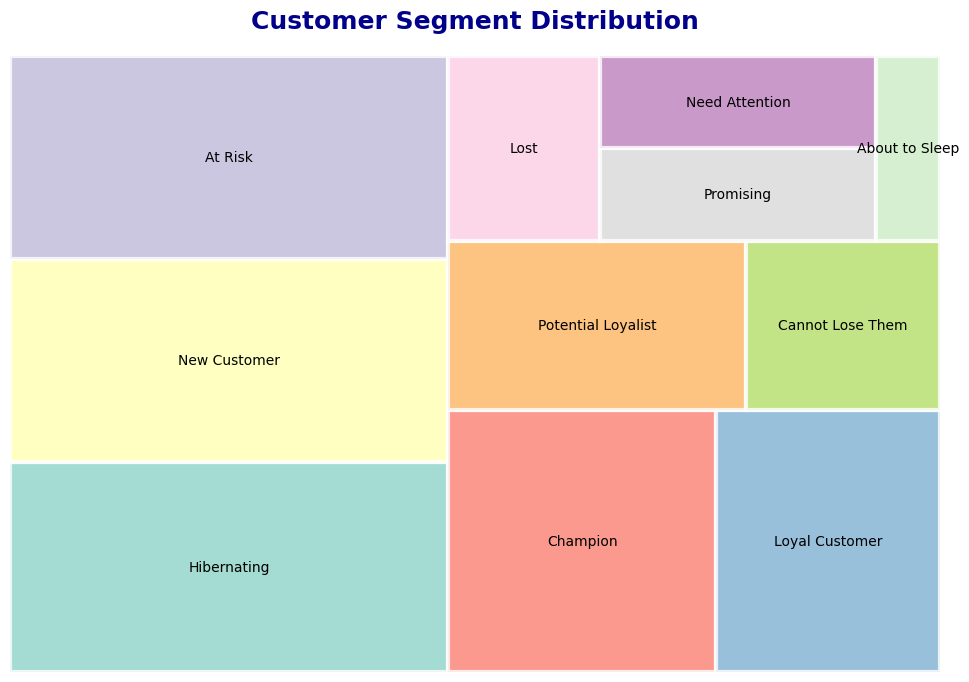

In [43]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

segment_counts = rfm['Customer Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer Segment', 'count']

colors = sns.color_palette('Set3', len(segment_counts))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=segment_counts['count'],
    label=segment_counts['Customer Segment'],
    color=colors,
    alpha=0.8,
    edgecolor='white',
    linewidth=3
)

plt.axis('off')

plt.title(
    'Customer Segment Distribution',
    fontsize=18,
    fontweight='bold',
    color='darkblue',
    pad=20
)

# Display the plot
plt.show()

In [44]:
# Mapping segmen ke kategori baru
segment_mapping = {
    'Champion': 'High-Value Customers',
    'Loyal Customer': 'High-Value Customers',
    'Potential Loyalist': 'Growth Potential',
    'Promising': 'Growth Potential',
    'New Customer': 'Growth Potential',
    'Hibernating': 'Dormant & At Risk',
    'About to Sleep': 'Dormant & At Risk',
    'At Risk': 'Dormant & At Risk',
    'Lost': 'Dormant & At Risk',
    'Need Attention': 'Critical Attention',
    'Cannot Lose Them': 'Critical Attention'
}

# Terapkan mapping
rfm['Simplified_Segment'] = rfm['Customer Segment'].map(segment_mapping)
rfm


,ID,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score,Customer Segment,Simplified_Segment
0,5524,58,22,1617,3,5,5,355,Loyal Customer,High-Value Customers
1,2174,38,4,27,4,1,1,411,New Customer,Growth Potential
2,4141,26,20,776,4,4,4,444,Loyal Customer,High-Value Customers
3,6182,26,6,53,4,2,1,421,New Customer,Growth Potential
4,5324,94,14,422,1,3,3,133,At Risk,Dormant & At Risk
...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,16,1341,3,4,5,345,Loyal Customer,High-Value Customers
2236,4001,56,15,444,3,4,3,343,Need Attention,Critical Attention
2237,7270,91,18,1241,1,4,5,145,At Risk,Dormant & At Risk
2238,8235,8,21,843,5,5,4,554,Champion,High-Value Customers


In [45]:
pd.DataFrame(rfm['Simplified_Segment'].value_counts())

,count
Simplified_Segment,
Dormant & At Risk,859
Growth Potential,645
High-Value Customers,501
Critical Attention,227


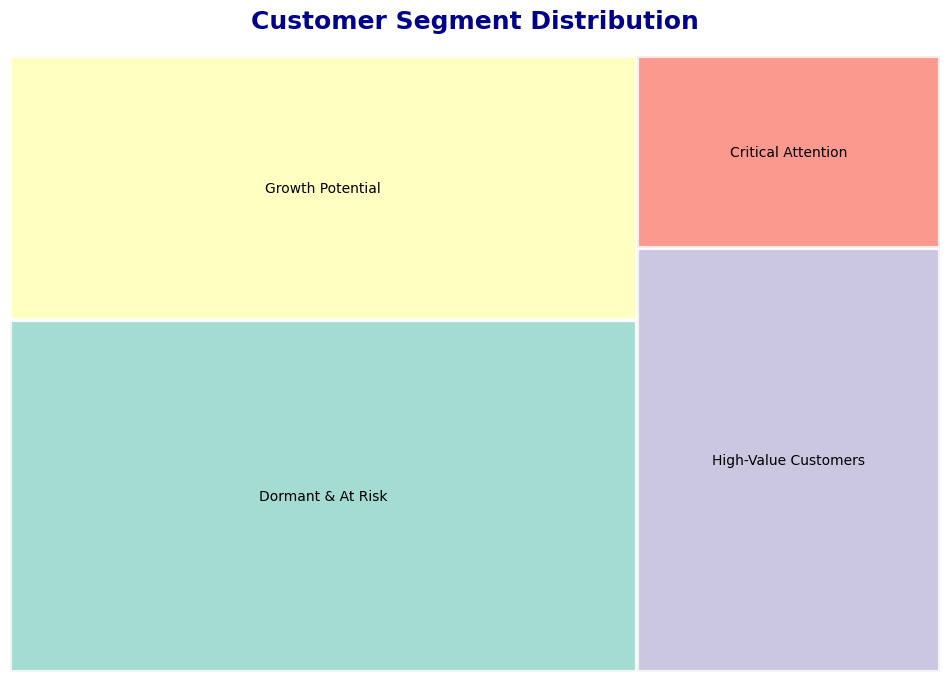

In [46]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

segment_counts = rfm['Simplified_Segment'].value_counts().reset_index()
segment_counts.columns = ['Simplified_Segment', 'count']

colors = sns.color_palette('Set3', len(segment_counts))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=segment_counts['count'],
    label=segment_counts['Simplified_Segment'],
    color=colors,
    alpha=0.8,
    edgecolor='white',
    linewidth=3
)

plt.axis('off')

plt.title(
    'Customer Segment Distribution',
    fontsize=18,
    fontweight='bold',
    color='darkblue',
    pad=20
)

# Display the plot
plt.show()

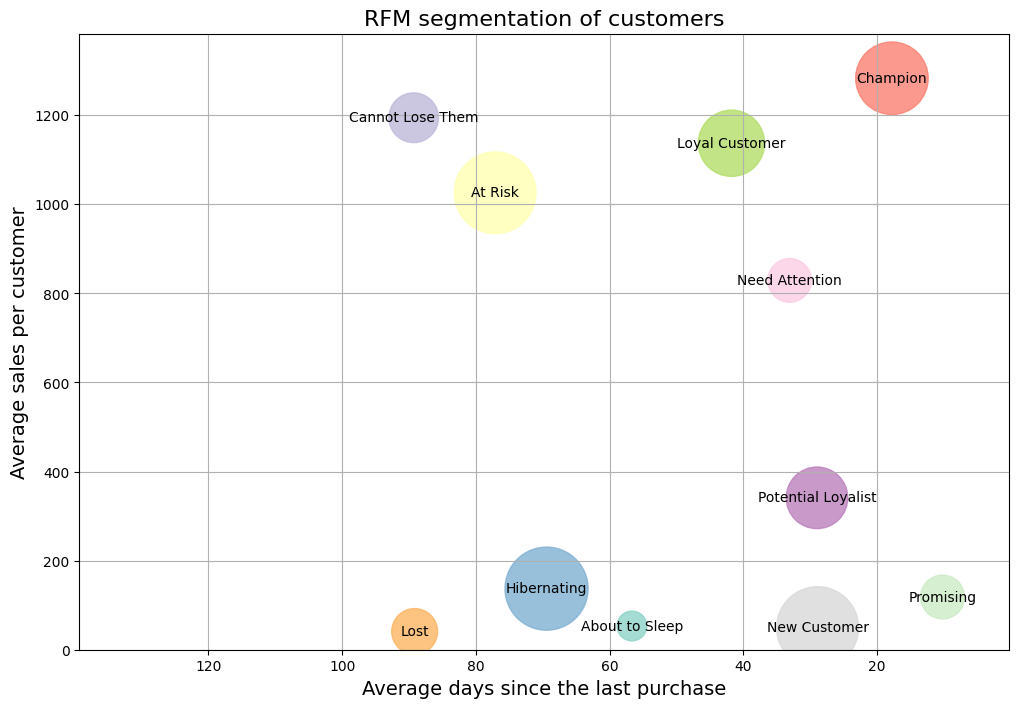

In [47]:
# rfm = pd.read_csv("rfm.csv")

segment_summary = rfm.groupby('Customer Segment').agg(
    avg_days_since_purchase=('recency', 'mean'),
    avg_sales_per_customer=('monetary', 'mean'),
    customer_count=('ID', 'count')
).reset_index()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    segment_summary['avg_days_since_purchase'],
    segment_summary['avg_sales_per_customer'],
    s=segment_summary['customer_count'] * 10,
    c=sns.color_palette('Set3', len(segment_summary)),
    alpha=0.8
)

# Labeling the axes and title
plt.xlabel('Average days since the last purchase', fontsize=14)
plt.ylabel('Average sales per customer', fontsize=14)
plt.title('RFM segmentation of customers', fontsize=16)
plt.grid(True)

for i, text in enumerate(segment_summary['Customer Segment']):
    plt.annotate(
        text,
        (segment_summary['avg_days_since_purchase'][i], segment_summary['avg_sales_per_customer'][i]),
        ha='center',
        va='center'
    )

plt.gca().invert_xaxis()

plt.xlim(segment_summary['avg_days_since_purchase'].max() + 50, segment_summary['avg_days_since_purchase'].min() - 10)
plt.ylim(0, segment_summary['avg_sales_per_customer'].max() + 100)

plt.show()


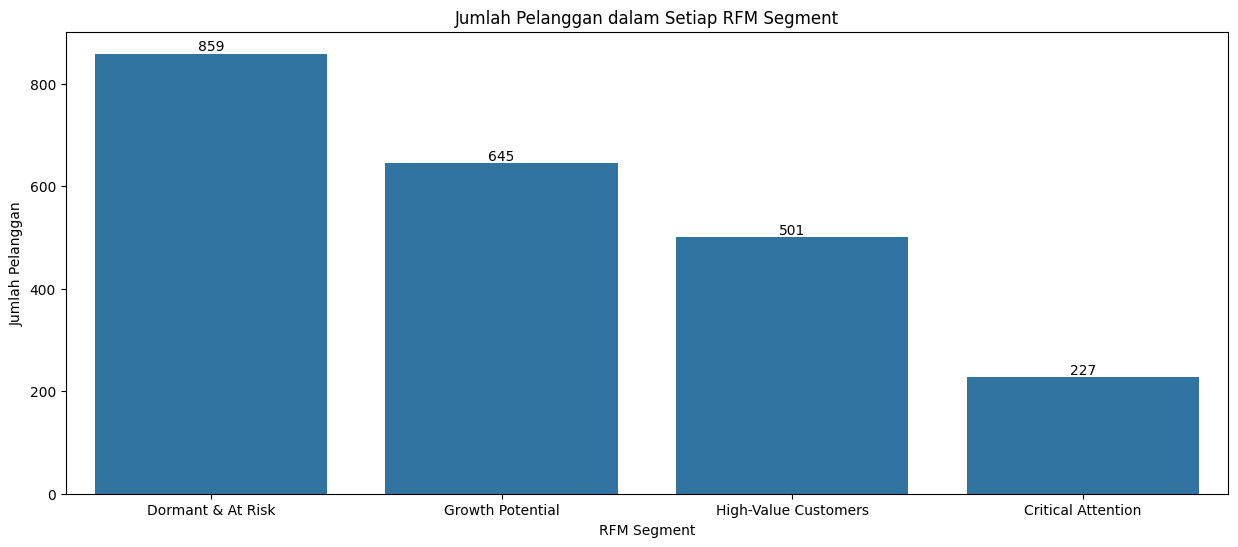

In [48]:
segment_counts = rfm['Simplified_Segment'].value_counts()

# Sort segments by count
ordered_segments = segment_counts.index

# Create the countplot with custom palette and sorted segments
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Simplified_Segment', data=rfm,  order=ordered_segments)
plt.title('Jumlah Pelanggan dalam Setiap RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Jumlah Pelanggan')

# Menambahkan label pada masing-masing bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', ha='center', va='bottom', fontsize=10)

plt.show()

`Insight`

1. `High-Value Customers`: `Champion` dan `Loyal Customer`
- pelanggan inti yang memberikan kontribusi besar secara berkelanjutan.
	
2. `Growth Potential`: `Potential Loyalist`, `Promising`, `New Customer`
- Pelanggan ini menunjukkan potensi pertumbuhan di masa depan jika dikelola dengan baik.

3. `Critical Attention`: `Need Attention` dan `Cannot Lose Them`
- Pelanggan ini membutuhkan perhatian langsung untuk mengembalikan loyalitas mereka.

4. `Dormant & At Risk`: `Hibernating`, `About to Sleep`,` At Risk`, `Lost`
- Pelanggan ini menunjukkan tanda-tanda tidak aktif atau berisiko kehilangan sepenuhnya.


In [49]:
# Left join df dengan Rfm berdasarkan kolom 'ID'
merged_df = df.merge(rfm[['ID', 'RFM_Score', 'Customer Segment', 'Simplified_Segment']], on='ID', how='left')
merged_df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Children,Age,Generation,Social_Class,recency,frequency,monetary,RFM_Score,Customer Segment,Simplified_Segment
0,5524,1957,Graduation,Alone,58138.0,0,0,2012-09-04,58,635,...,0,55,Boomers,Middle Class,58,22,1617,355,Loyal Customer,High-Value Customers
1,2174,1954,Graduation,Alone,46344.0,1,1,2014-03-08,38,11,...,2,60,Boomers,Middle Class,38,4,27,411,New Customer,Growth Potential
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,0,48,Gen X,Middle Class,26,20,776,444,Loyal Customer,High-Value Customers
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-02-10,26,11,...,1,30,Millennials,Lower Class,26,6,53,421,New Customer,Growth Potential
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,1,33,Millennials,Middle Class,94,14,422,133,At Risk,Dormant & At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,10870,1967,Graduation,Partner,61223.0,0,1,2013-06-13,46,709,...,1,46,Gen X,Middle Class,46,16,1341,345,Loyal Customer,High-Value Customers
2228,4001,1946,PhD,Partner,64014.0,2,1,2014-06-10,56,406,...,3,68,Boomers,Middle Class,56,15,444,343,Need Attention,Critical Attention
2229,7270,1981,Graduation,Alone,56981.0,0,0,2014-01-25,91,908,...,0,33,Millennials,Middle Class,91,18,1241,145,At Risk,Dormant & At Risk
2230,8235,1956,Master,Partner,69245.0,0,1,2014-01-24,8,428,...,1,58,Boomers,Middle Class,8,21,843,554,Champion,High-Value Customers


In [50]:
# merged_df.to_csv('supermaket_fix.csv')

## 2.1 segmentasi RFM terhadap demografi pelanggan

Berdasarkan tiap Generasi 

saya sudah membuat kolom baru Generation dengan rentang usia berdasarkan sumber ini
https://libguides.usc.edu/busdem/age#:~:text=The%20Baby%20Boomer%20Generation%20%E2%80%93%20born,Z%20%E2%80%93%20born%201995%2D2012.


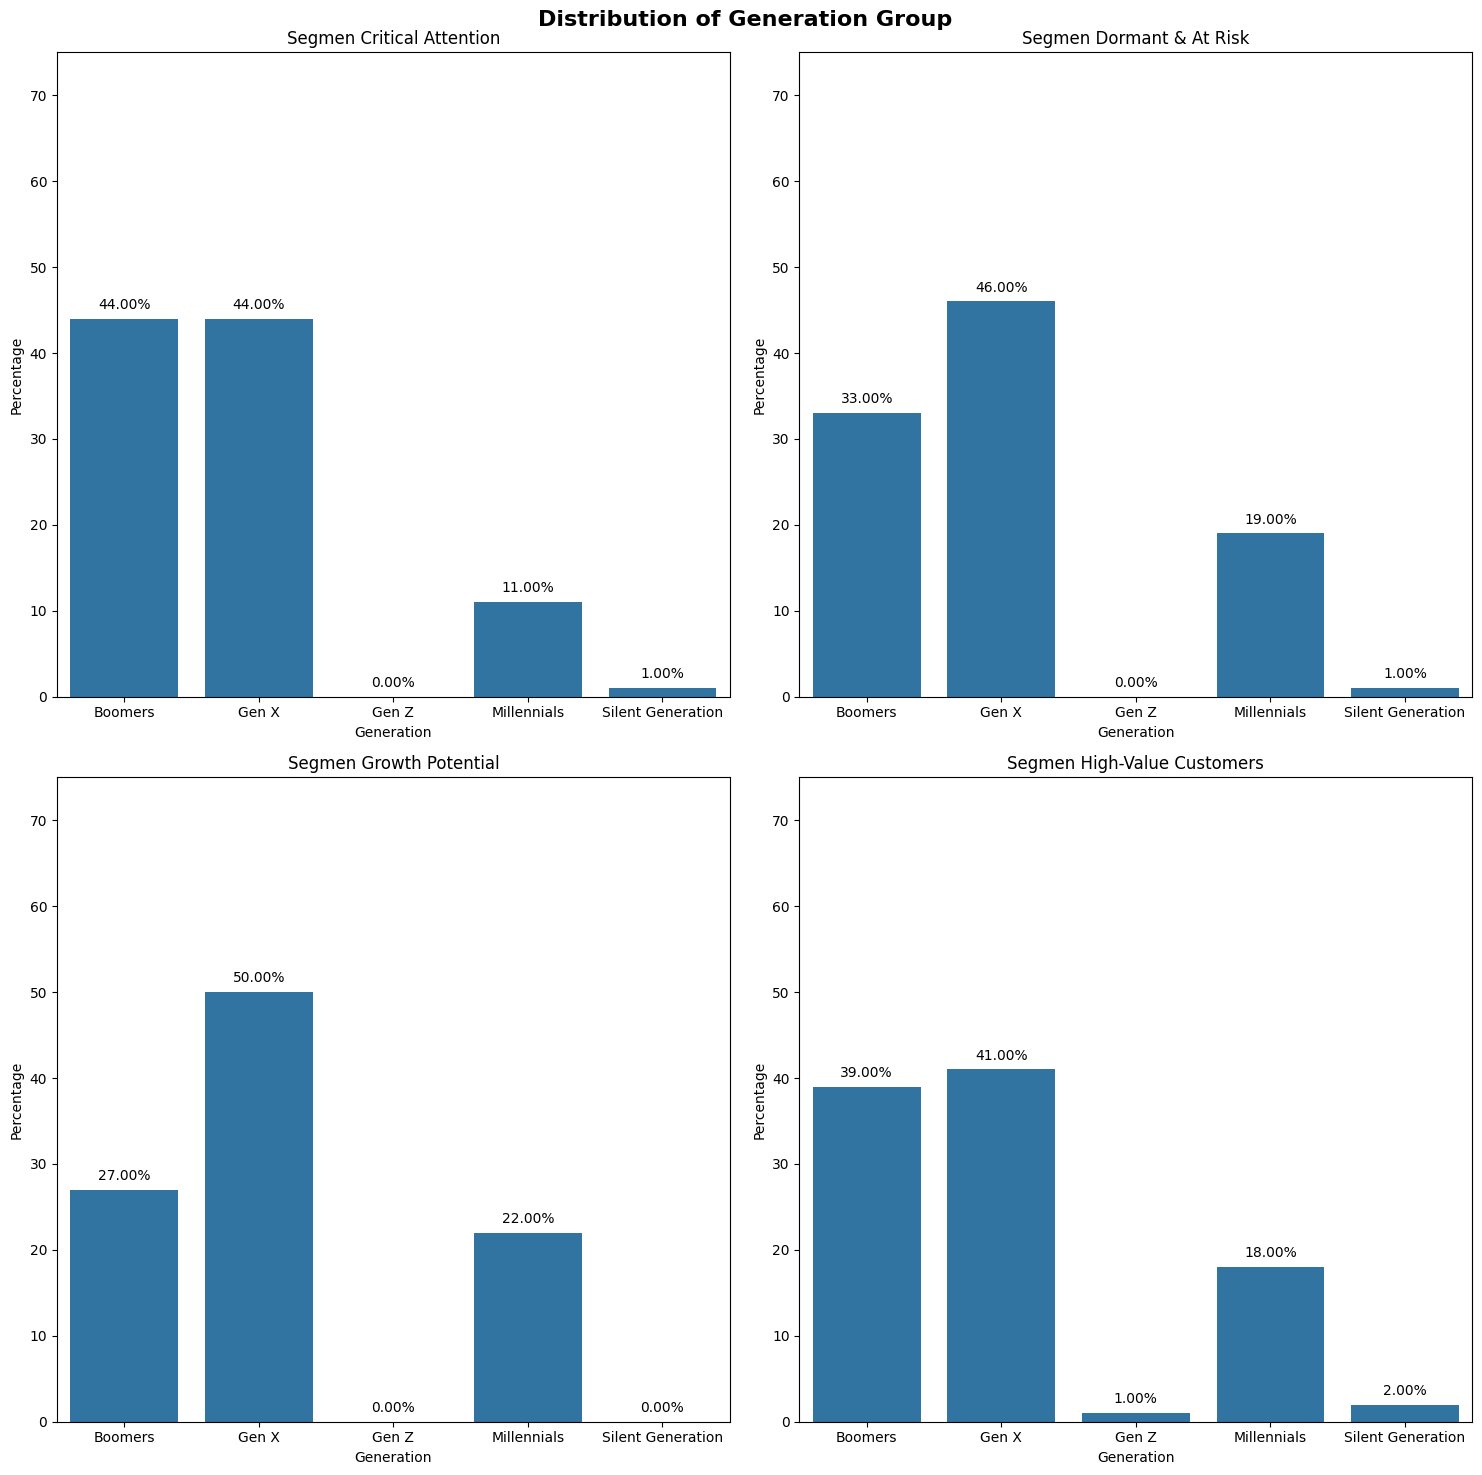

In [51]:
segementasi_edu = merged_df.groupby(['Simplified_Segment', 'Generation']).size().reset_index(name='Count')

# Merubah orientasi dengan menggunakan pivot
segementasi_edu = segementasi_edu.pivot(index='Generation', columns='Simplified_Segment', values='Count')

# Menampilkan data dalam bentuk persentase
segementasi_edu = segementasi_edu.div(segementasi_edu.sum(), axis=1).fillna(0).round(2) * 100

# Mengatur ukuran dan tata letak subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Distribution of Generation Group', fontsize=16, fontweight='bold')

# Membuat barplot
for i, column in enumerate(segementasi_edu.columns):
    row = i // 2  
    col = i % 2   
    sns.barplot(x=segementasi_edu.index, y=segementasi_edu[column], ax=axes[row, col])
    axes[row, col].set_title(f'Segmen {column}')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_ylim(bottom=0, top=75)  
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


`Insight`

- Gen X adalah generasi dominan di sebagian besar segmen, terutama di segmen Growth Potential dan High-Value Customers.
- Boomers memiliki dampak cukup signifikan, terutama di segmen Critical Attention dan High-Value Customers.
- Millennials muncul di semua segmen, dengan proporsi paling tinggi di segmen Growth Potential (22%), Dormant & At Risk (19%) dan High Value (18%).
- Gen Z dan Silent Generation memiliki representasi yang sangat kecil atau tidak ada sama sekali.


`Berdasarkan Kelas Sosial Ekonomi`

Pembagian Income pada kolom Sosial Class berdasarkan sumber ini:

https://www.pewresearch.org/social-trends/2016/05/11/1-the-american-middle-class-loses-ground-nationally/#:~:text=Urban%20Honolulu%2C%20HI%2C%20was%20one,income%20and%20middle%20income%20rise.

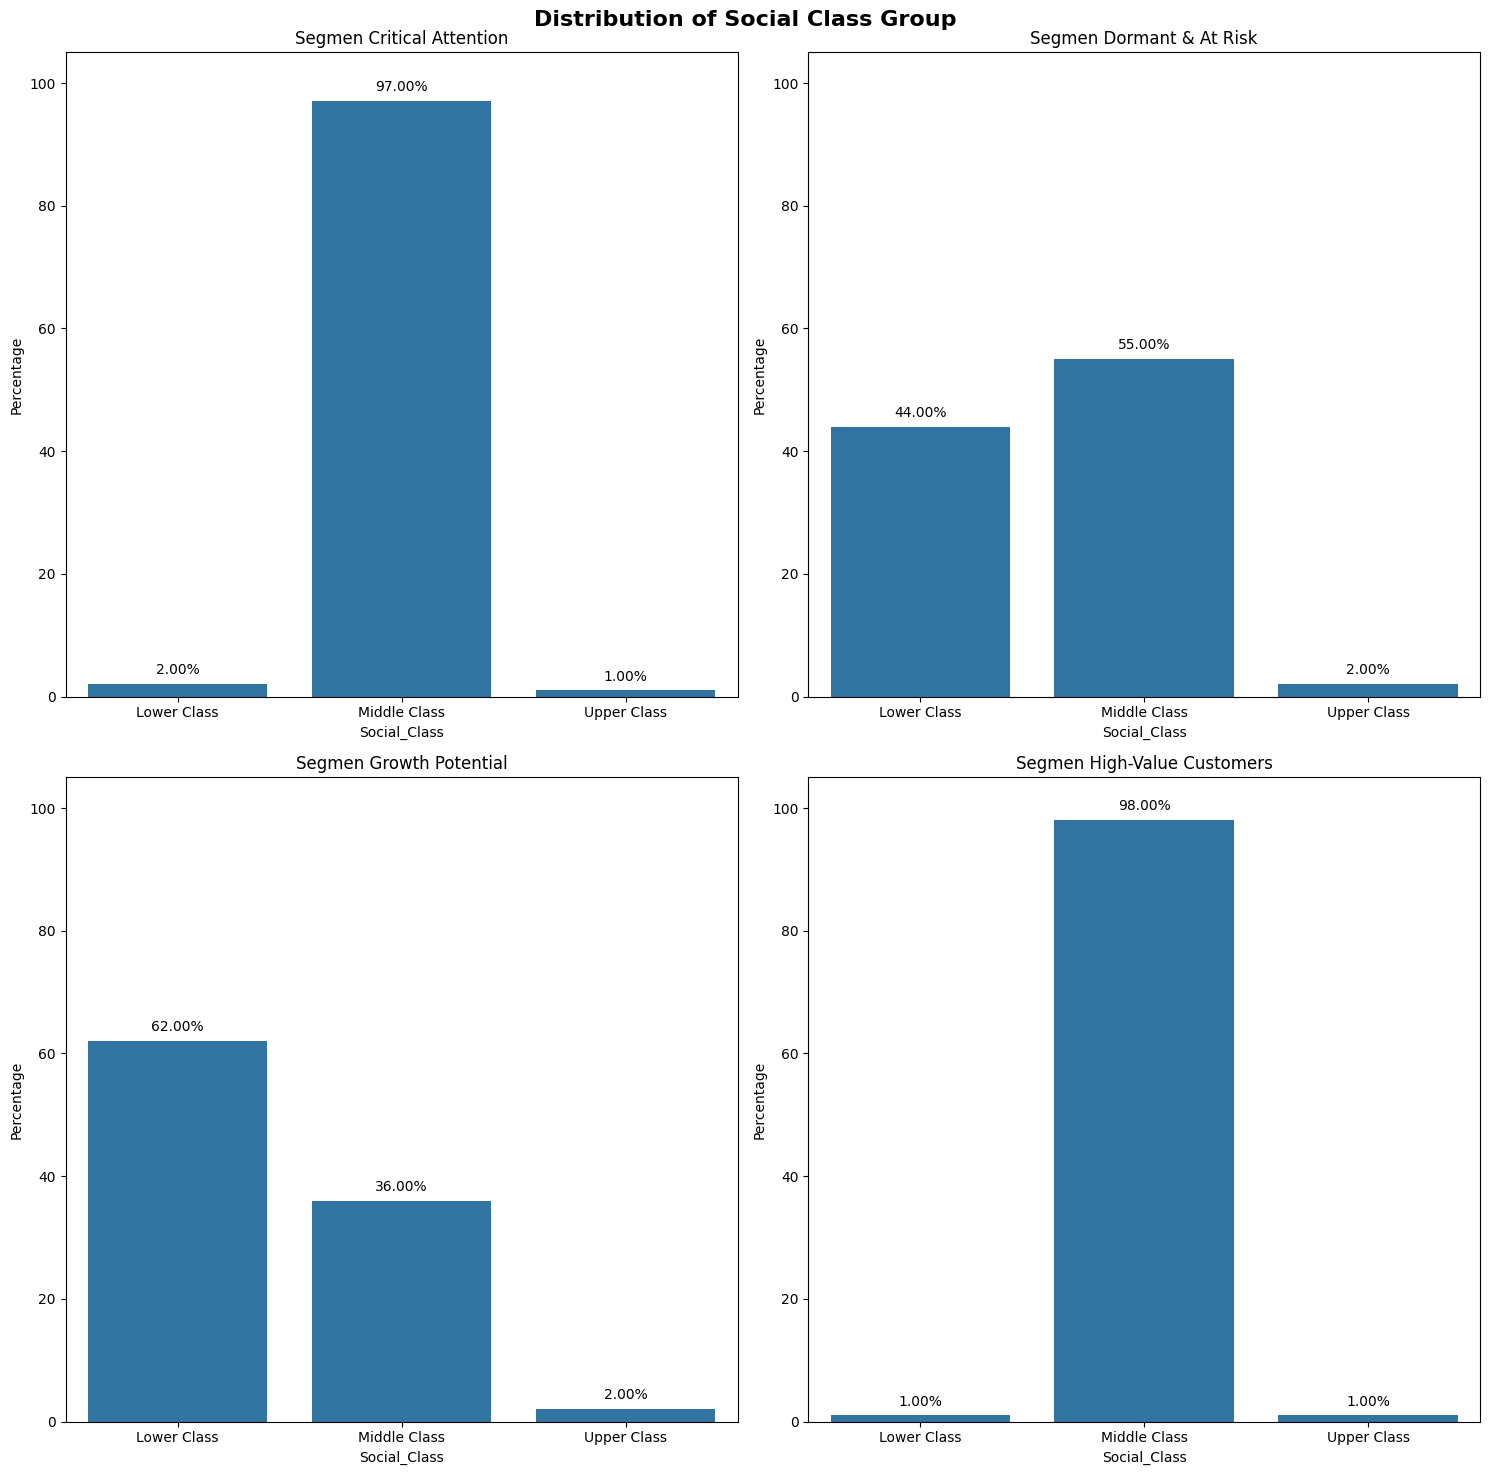

In [52]:
segementasi_edu = merged_df.groupby(['Simplified_Segment', 'Social_Class']).size().reset_index(name='Count')

# Merubah orientasi dengan menggunakan pivot
segementasi_edu = segementasi_edu.pivot(index='Social_Class', columns='Simplified_Segment', values='Count')

# Menampilkan data dalam bentuk persentase
segementasi_edu = segementasi_edu.div(segementasi_edu.sum(), axis=1).fillna(0).round(2) * 100

# Mengatur ukuran dan tata letak subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Distribution of Social Class Group', fontsize=16, fontweight='bold')

# Membuat barplot
for i, column in enumerate(segementasi_edu.columns):
    row = i // 2  
    col = i % 2   
    sns.barplot(x=segementasi_edu.index, y=segementasi_edu[column], ax=axes[row, col])
    axes[row, col].set_title(f'Segmen {column}')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_ylim(bottom=0, top=105)  
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


`Insight`

- Berdasarkan Kelas Sosial ekonomi, pelanggan pada umumnya didominasi oleh Middle Class, sedikit sekali persentasi Upper class hanya berkisar 1 - 2% saja
- Lower Class memiliki representasi yang signifikan di segmen Dormant & At Risk (44%) dan menjadi mayoritas di segmen Growth Potential (62%).

`Berdasarkan Education`

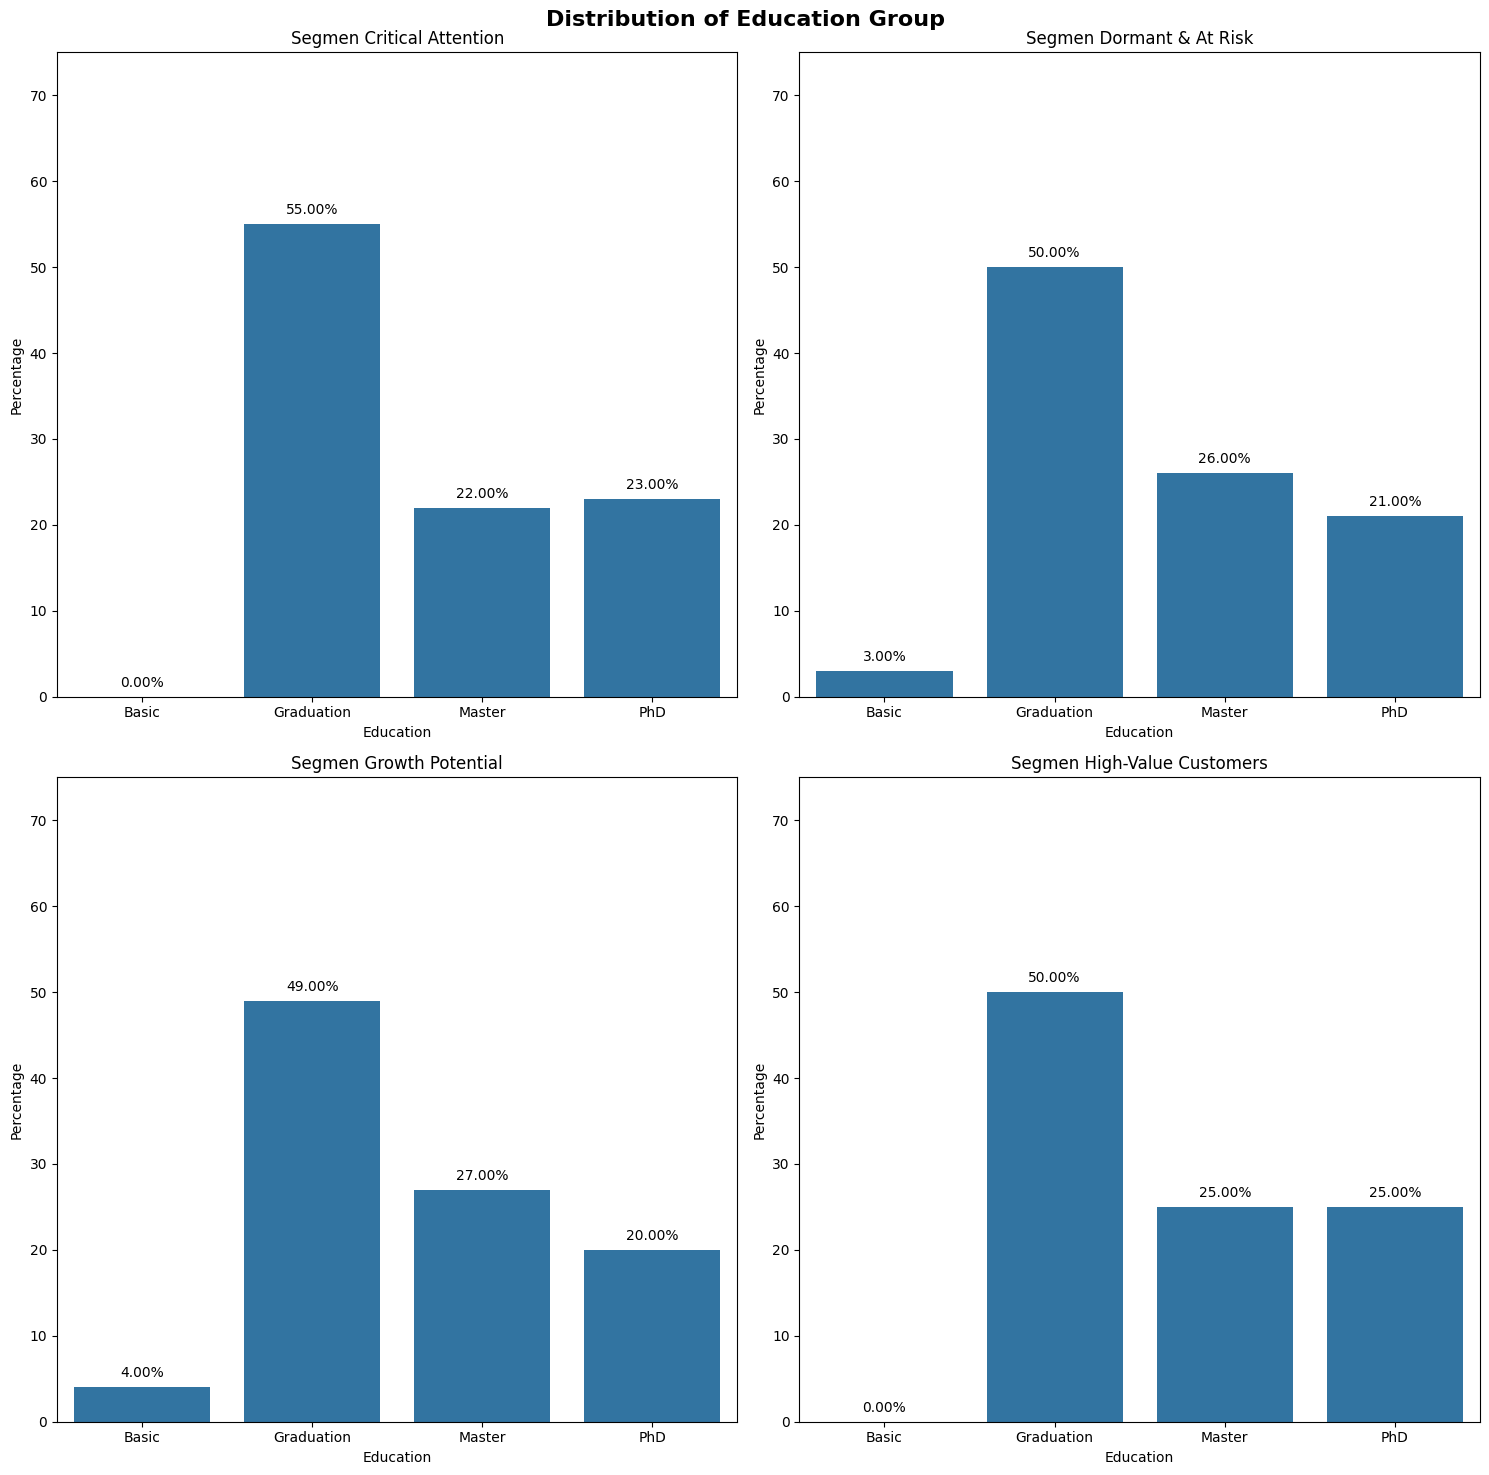

In [53]:
segementasi_edu = merged_df.groupby(['Simplified_Segment', 'Education']).size().reset_index(name='Count')

# Merubah orientasi dengan menggunakan pivot
segementasi_edu = segementasi_edu.pivot(index='Education', columns='Simplified_Segment', values='Count')

# Menampilkan data dalam bentuk persentase
segementasi_edu = segementasi_edu.div(segementasi_edu.sum(), axis=1).fillna(0).round(2) * 100

# Mengatur ukuran dan tata letak subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Distribution of Education Group', fontsize=16, fontweight='bold')

# Membuat barplot
for i, column in enumerate(segementasi_edu.columns):
    row = i // 2  
    col = i % 2   
    sns.barplot(x=segementasi_edu.index, y=segementasi_edu[column], ax=axes[row, col])
    axes[row, col].set_title(f'Segmen {column}')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_ylim(bottom=0, top=75)  
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


`Insight`

- Tingkat pendidikan Graduation mendominasi di semua segmen, menunjukkan bahwa sebagian besar pelanggan berada pada tingkat pendidikan ini.
- Tingkat pendidikan Basic memiliki representasi yang sangat kecil atau bahkan nol di sebagian besar segmen, sehingga strategi untuk pelanggan dengan pendidikan rendah mungkin tidak relevan.
- Pelanggan dengan pendidikan lebih tinggi (Master dan PhD) cukup signifikan di sebagian besar segmen, yang menunjukkan bahwa mereka bisa menjadi target utama untuk strategi jangka panjang.

`Berdasarkan Jumlah Anak`

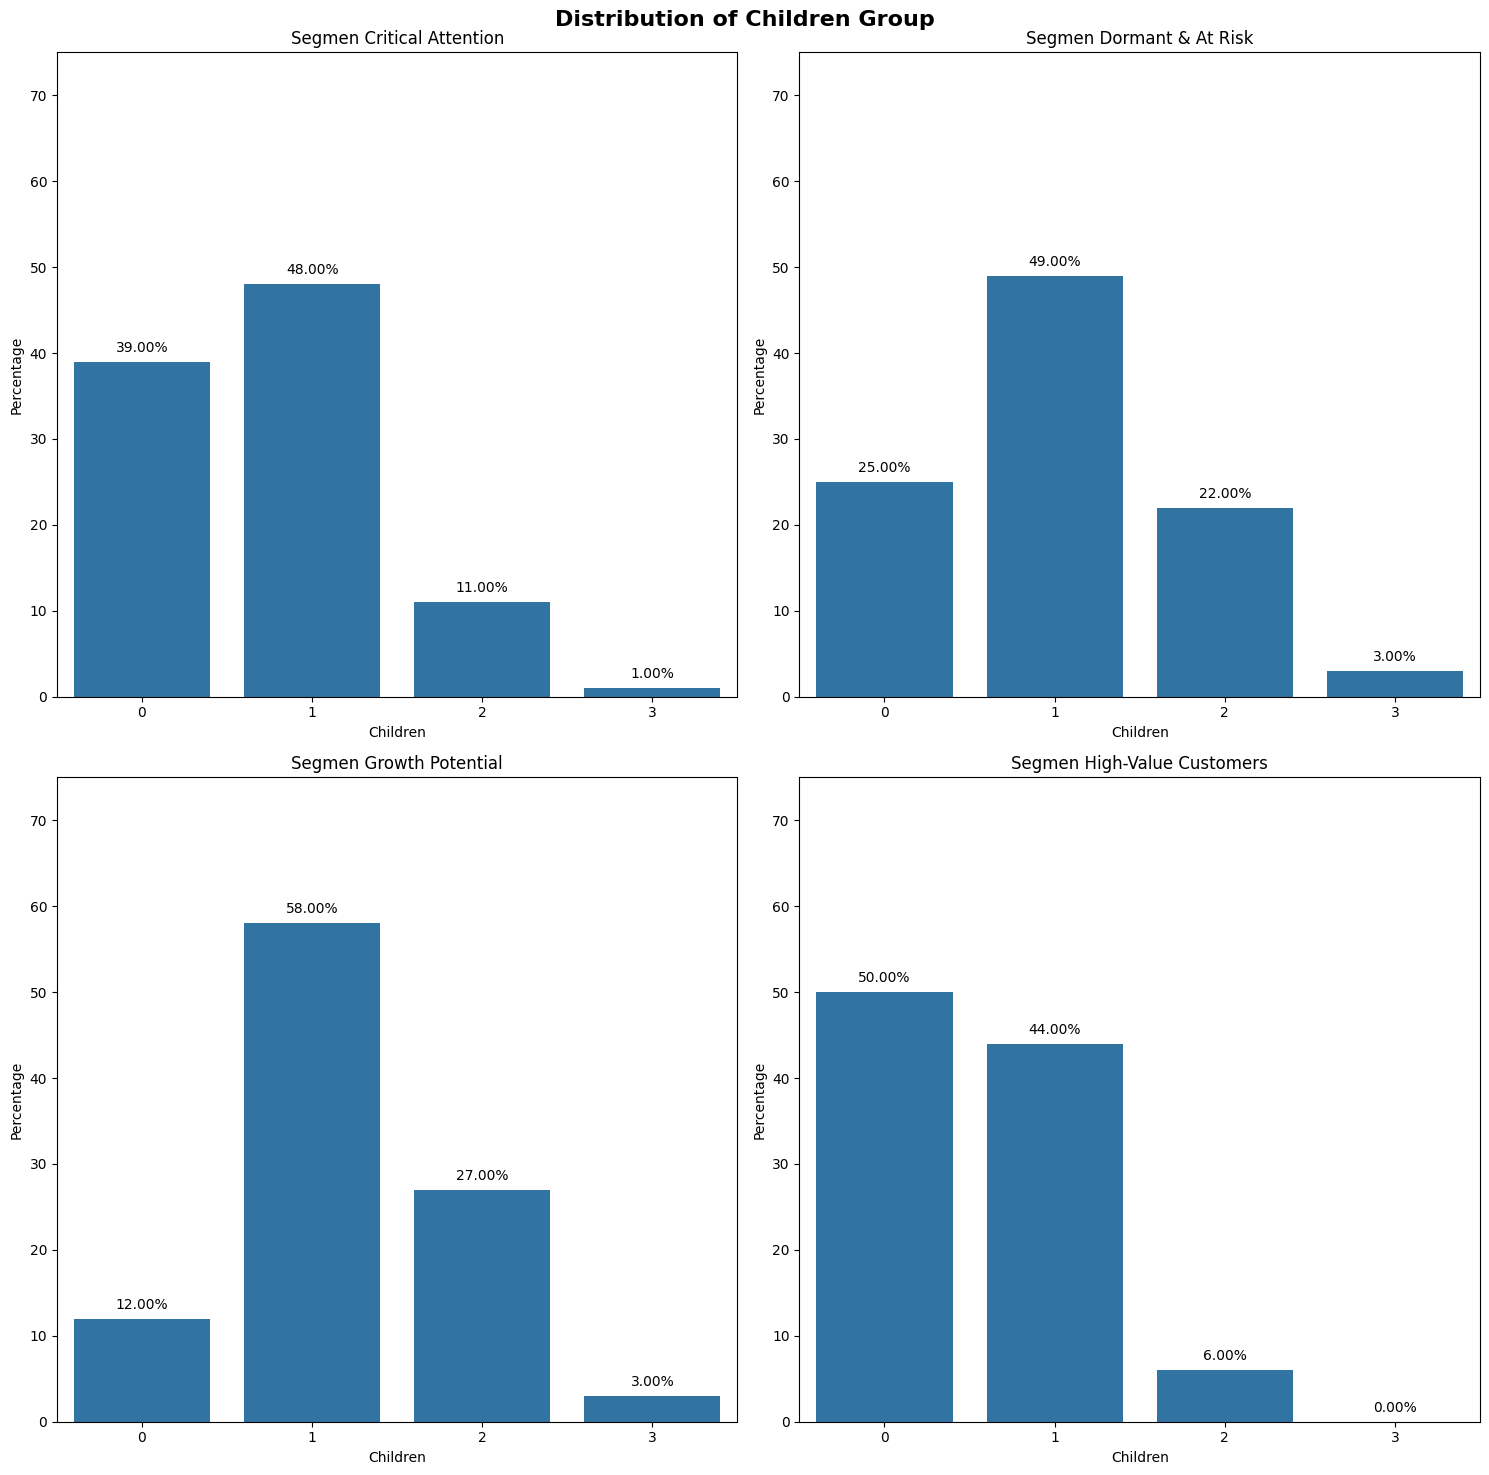

In [54]:
segementasi_child = merged_df.groupby(['Simplified_Segment', 'Children']).size().reset_index(name='Count')

# Merubah orientasi dengan menggunakan pivot
segementasi_child = segementasi_child.pivot(index='Children', columns='Simplified_Segment', values='Count')


# Menampilkan data dalam bentuk persentase
segementasi_child = segementasi_child.div(segementasi_child.sum(), axis=1).fillna(0).round(2) * 100

# Mengatur ukuran dan tata letak subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Distribution of Children Group', fontsize=16, fontweight='bold')

# Membuat barplot
for i, column in enumerate(segementasi_child.columns):
    row = i // 2  
    col = i % 2   
    sns.barplot(x=segementasi_child.index, y=segementasi_child[column], ax=axes[row, col])
    axes[row, col].set_title(f'Segmen {column}')
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_ylim(bottom=0, top=75)  
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


`Insight`

- Keluarga dengan 1 anak adalah mayoritas di semua segmen, kecuali segmen High-Value Customers yang cukup seimbang antara pelanggan tanpa anak dan pelanggan dengan 1 anak.
- Pelanggan dengan 2 anak memiliki representasi yang signifikan di segmen Growth Potential dan Dormant & At Risk, tetapi rendah di segmen lainnya.
- Pelanggan dengan 3 anak memiliki representasi yang sangat kecil di semua segmen.

## 2.2 Analisis Produk

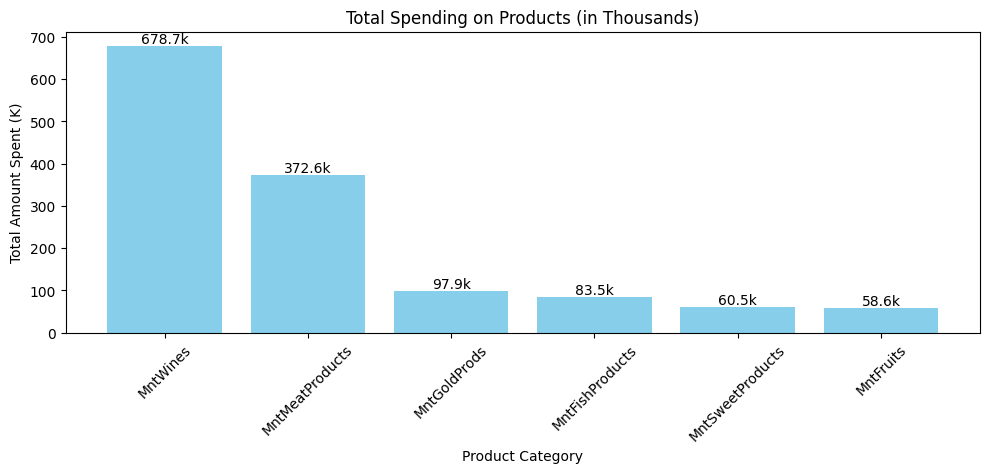

In [68]:
product_columns = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
]

summary = merged_df[product_columns].sum().sort_values(ascending=False) / 1000

# Plotting
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
bars = plt.bar(summary.index, summary.values, color='skyblue')
plt.title('Total Spending on Products (in Thousands)')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent (K)')
plt.xticks(rotation=45)

# Adding labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}k', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


`Insight `
- Produk Anggur (Wines) menjadi kategori dengan pengeluaran tertinggi (678,7 ribu), menunjukkan popularitas atau prioritas tinggi di antara konsumen.
- Produk Buah-buahan (Fruits) memiliki pengeluaran terendah (58,6 ribu), mengindikasikan bahwa kategori ini kurang diminati atau memiliki permintaan yang rendah.
- Kategori Produk Daging (MeatProducts) menempati posisi kedua dengan pengeluaran cukup besar (372,6 ribu), menunjukkan bahwa produk ini juga penting bagi konsumen.
- Ada kesenjangan yang signifikan antara kategori pengeluaran tertinggi dan terendah, yang dapat menjadi acuan untuk strategi pemasaran yang lebih efektif, baik dengan memperkuat kategori unggulan atau meningkatkan daya tarik kategori yang kurang diminati.

### cek Korelasi antar produk

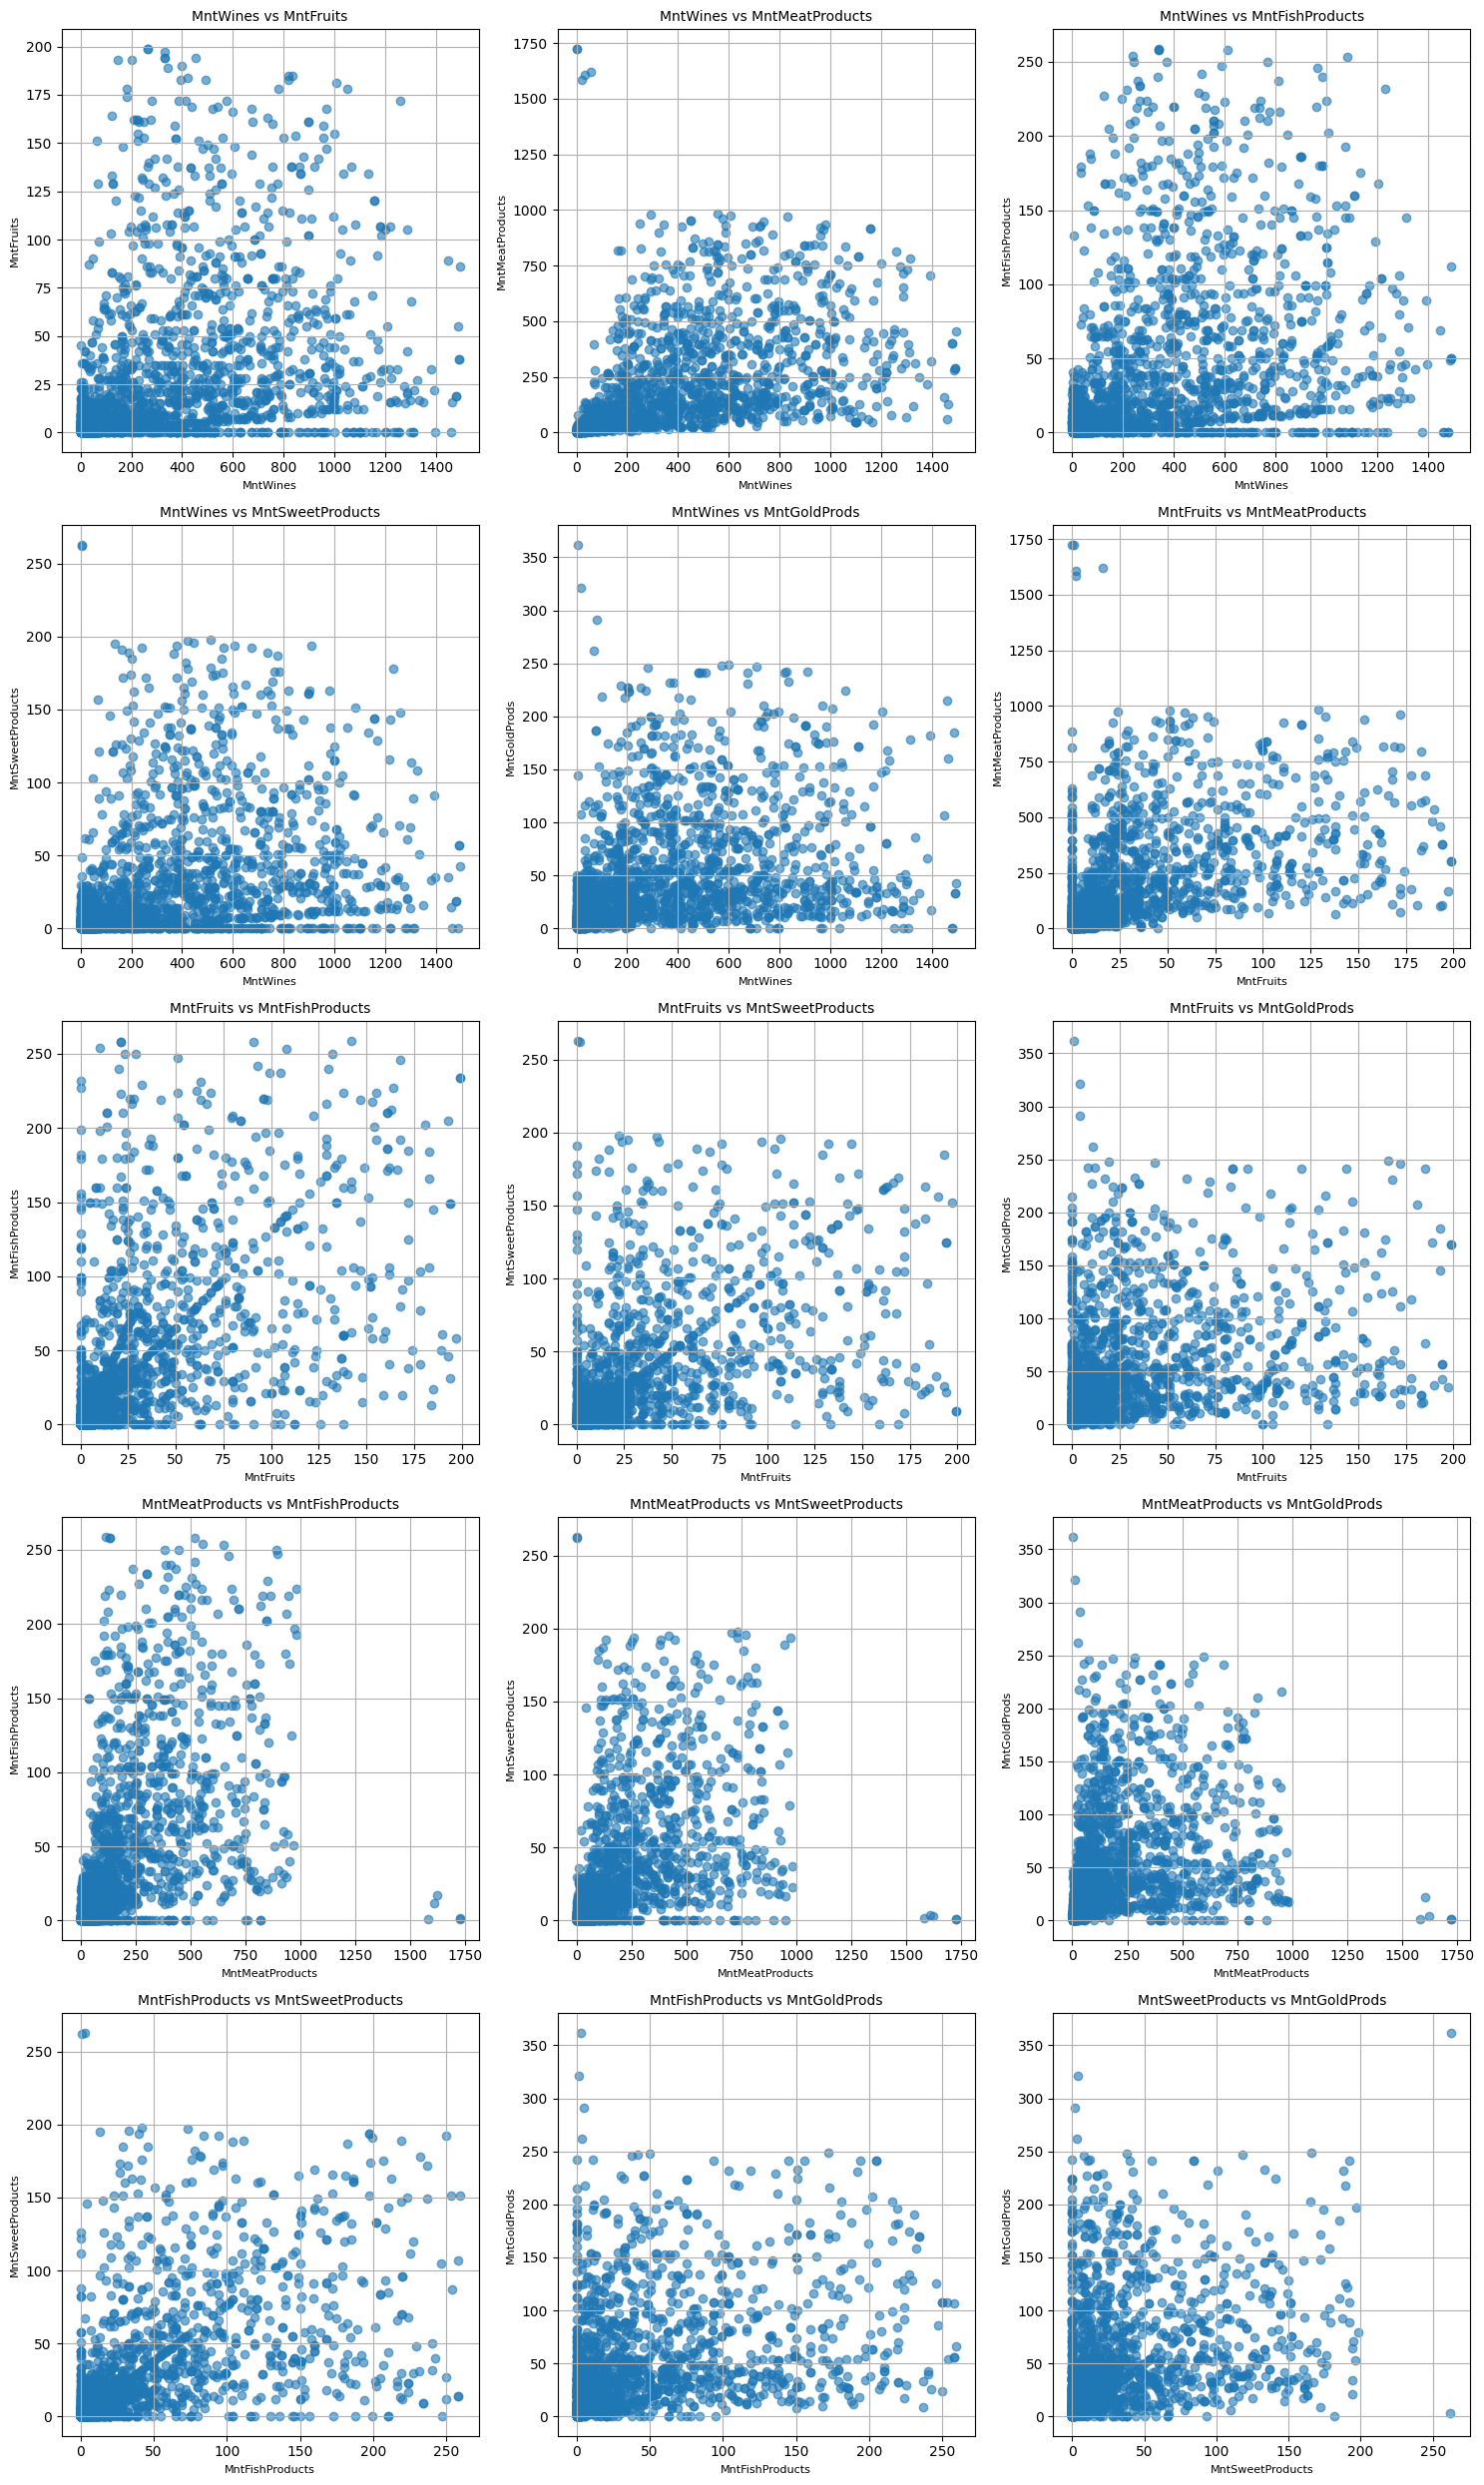

In [56]:
import matplotlib.pyplot as plt
import math

# Kolom produk dan demografi
columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Menyimpan pasangan unik (tidak redundan)
pairs = [(col_x, col_y) for i, col_x in enumerate(columns_to_plot) for j, col_y in enumerate(columns_to_plot) if i < j]

# Mengatur jumlah kolom untuk grid
num_cols = 3
num_rows = math.ceil(len(pairs) / num_cols) 

# Membuat figure dan axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten() 

# Loop untuk membuat scatterplot
for idx, (col_x, col_y) in enumerate(pairs):
    ax = axes[idx]
    ax.scatter(merged_df[col_x], merged_df[col_y], alpha=0.6)
    ax.set_title(f"{col_x} vs {col_y}", fontsize=10)
    ax.set_xlabel(col_x, fontsize=8)
    ax.set_ylabel(col_y, fontsize=8)
    ax.grid(True)

# Menghapus axes kosong jika ada
for idx in range(len(pairs), len(axes)):
    fig.delaxes(axes[idx])

# Menyusun layout
plt.tight_layout()
plt.show()

In [57]:
product_columns = merged_df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [58]:
df_product_corr = product_columns.corr(method='spearman')
df_product_corr

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
MntWines,1.000000,0.517449,0.823680,0.524734,0.505128,0.574739
MntFruits,0.517449,1.000000,0.712884,0.704288,0.692296,0.567569
MntMeatProducts,0.823680,0.712884,1.000000,0.726278,0.696942,0.637253
MntFishProducts,0.524734,0.704288,0.726278,1.000000,0.702511,0.564358
MntSweetProducts,0.505128,0.692296,0.696942,0.702511,1.000000,0.543723
MntGoldProds,0.574739,0.567569,0.637253,0.564358,0.543723,1.000000


Text(0.5, 1.0, 'Correlation between product categories')

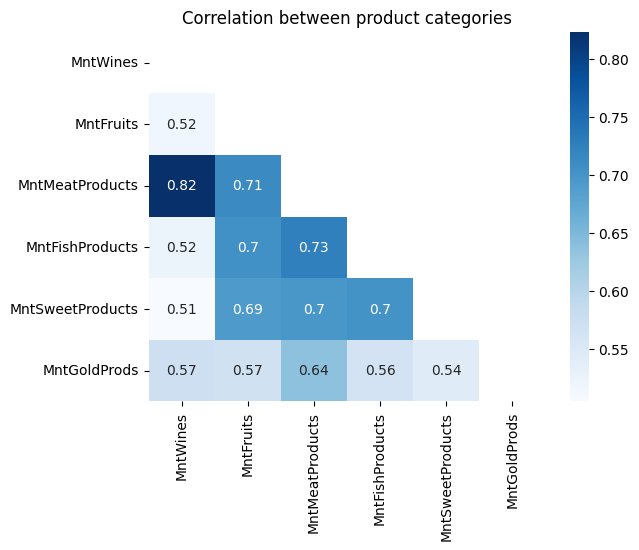

In [65]:
matrix = np.triu(df_product_corr)
sns.heatmap(
    data = df_product_corr,
    annot=True ,
    mask = matrix,
    cmap='Blues')
plt.title('Correlation between product categories')

`Insight`

- `Korelasi Tinggi`:
MntMeatProducts memiliki korelasi sangat tinggi dengan MntWines (0.82).
Ini menunjukkan bahwa pelanggan yang membeli produk daging juga cenderung membeli wine. Pola ini menunjukkan bahwa kedua produk ini sering dikonsumsi bersamaan, misalnya untuk kebutuhan makan malam atau acara tertentu.
MntMeatProducts memiliki korelasi yang sangat tinggi dengan MntFishProducts (0.73) dan MntSweetProducts (0.70). Hal ini menunjukkan bahwa pelanggan yang cenderung membeli produk daging sering juga membeli produk ikan dan manis.
Korelasi MntMeatProducts dan MntFruits (0.71) juga signifikan, mengindikasikan hubungan pembelian yang kuat antara daging dan buah-buahan.

- `Korelasi Sedang`:
MntGoldProds memiliki korelasi sedang dengan semua kategori lainnya, terutama dengan MntMeatProducts (0.64). Hal ini menunjukkan bahwa produk premium (gold products) memiliki hubungan pembelian yang cukup luas, tetapi tidak terlalu kuat.

- `Korelasi Rendah`:
MntWines memiliki korelasi yang rendah dengan kategori lainnya (rata-rata 0.51-0.57). Ini menunjukkan bahwa pembelian wine relatif independen dibandingkan kategori lain.


## 2.3 Analisis Preferensi Tempat belanja

In [60]:
# Definisikan kolom yang relevan
place_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Menghitung total pembelian berdasarkan kolom place_columns per segment
place_vs_segment_total = merged_df.groupby(['Simplified_Segment'])[place_columns].sum().reset_index()

# Mengubah orientasi data menjadi pivot menggunakan pandas.melt dan pivot
place_vs_segment_pivot = place_vs_segment_total.melt(
    id_vars='Simplified_Segment',
    var_name='Purchase_Type',
    value_name='Total'
).pivot(
    index='Purchase_Type', 
    columns='Simplified_Segment', 
    values='Total'
)

# Menghitung persentase untuk setiap kolom (per segmen)
place_vs_segment_pivot_percentage = place_vs_segment_pivot.div(
    place_vs_segment_pivot.sum(axis=0),  # Total per segmen (sum axis=0)
    axis=1  # Pembagian berdasarkan kolom
).fillna(0).round(2) * 100

place_vs_segment_pivot_percentage


Simplified_Segment,Critical Attention,Dormant & At Risk,Growth Potential,High-Value Customers
Purchase_Type,,,,
NumCatalogPurchases,24.0,19.0,11.0,26.0
NumStorePurchases,43.0,48.0,52.0,44.0
NumWebPurchases,33.0,33.0,37.0,30.0


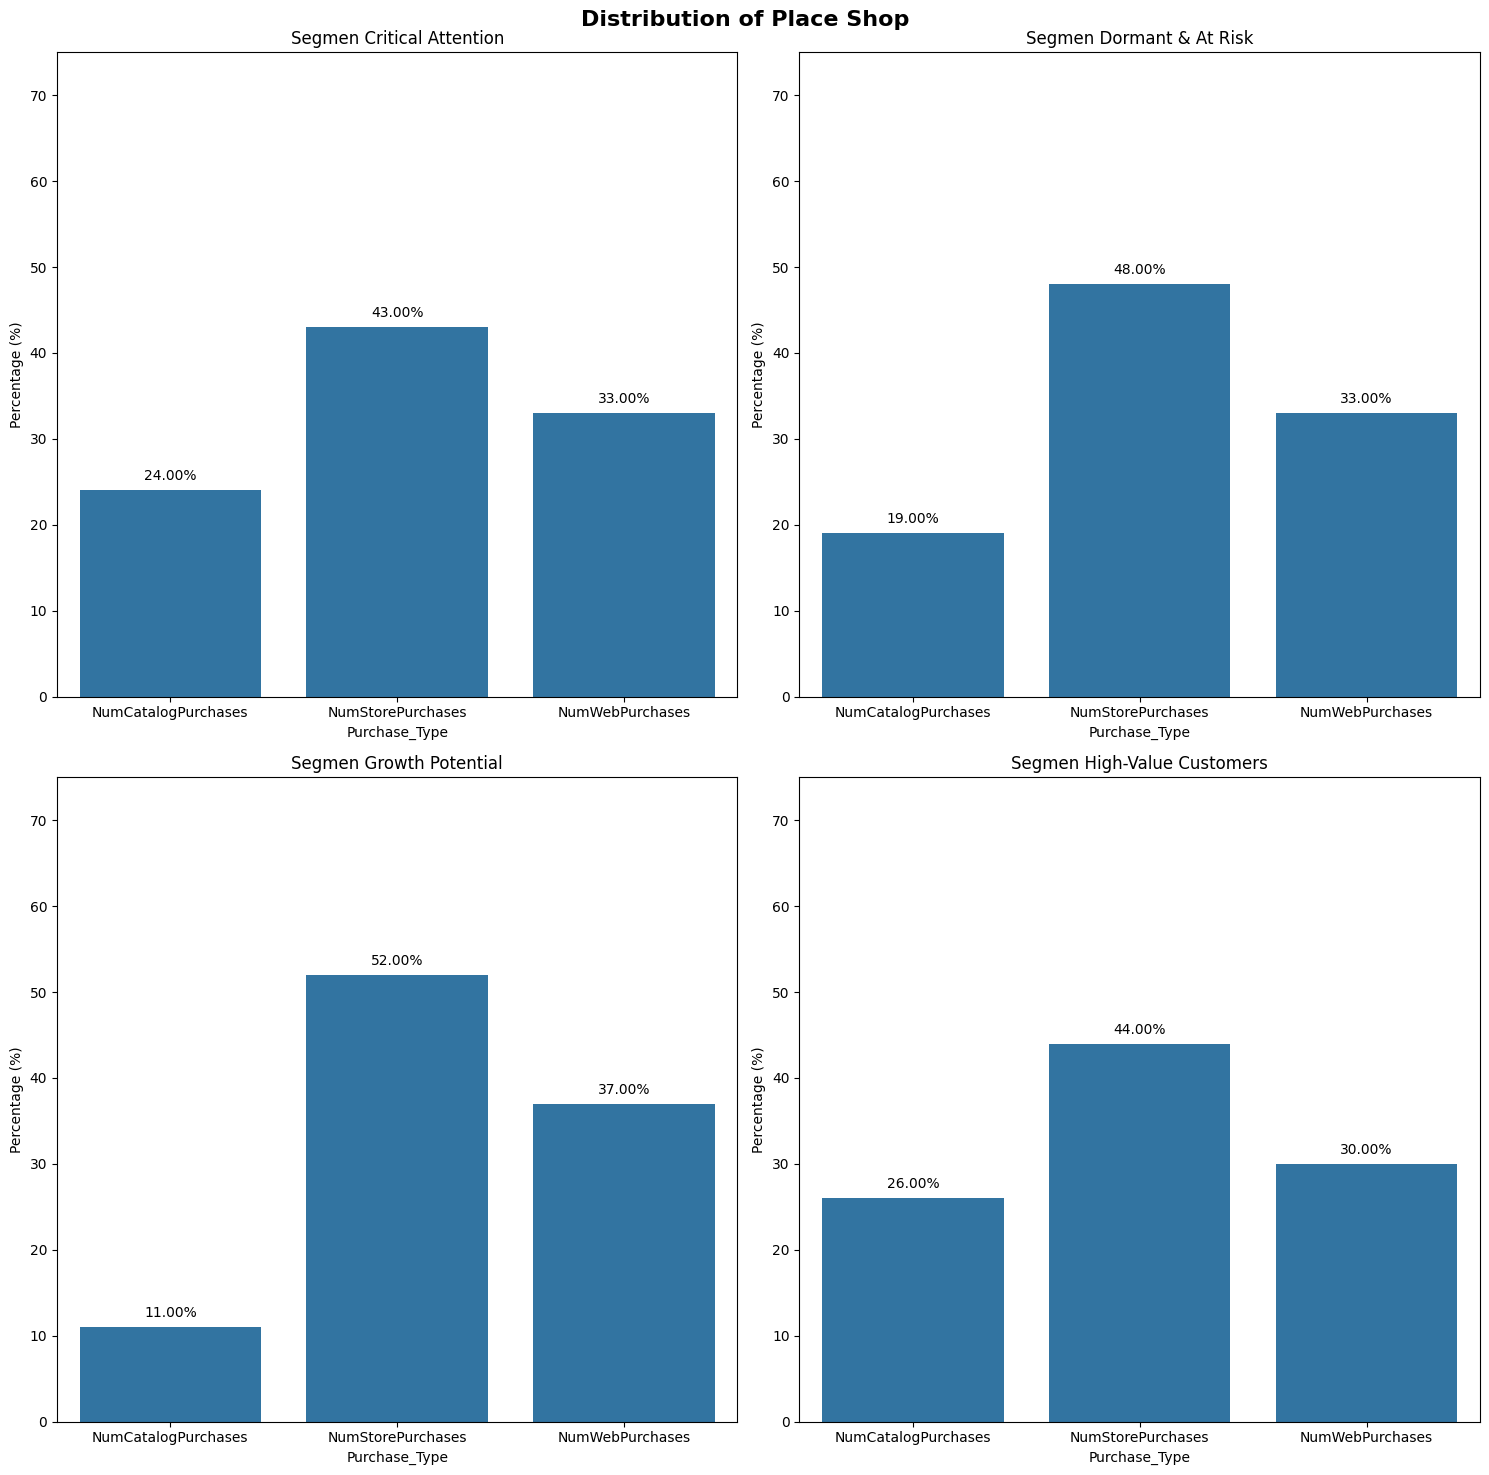

In [61]:
# Mengatur ukuran dan tata letak subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Distribution of Place Shop', fontsize=16, fontweight='bold')

# Membuat barplot
for i, column in enumerate(place_vs_segment_pivot_percentage.columns):
    row = i // 2  
    col = i % 2   
    sns.barplot(x=place_vs_segment_pivot_percentage.index, y=place_vs_segment_pivot_percentage[column], ax=axes[row, col])
    axes[row, col].set_title(f'Segmen {column}')
    axes[row, col].set_ylabel('Percentage (%)')
    axes[row, col].set_ylim(bottom=0, top=75) 
    for p in axes[row, col].patches:
        axes[row, col].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


`Insight`
- Sebagian besar segmen pelanggan cenderung berbelanja di toko fisik, menunjukkan bahwa kanal ini sangat penting untuk mempertahankan dan meningkatkan penjualan.

- Peluang di Kanal Digital: Kanal web memiliki peluang pertumbuhan besar, terutama pada segmen Growth Potential dan Dormant & At Risk, yang dapat dimanfaatkan dengan strategi pemasaran digital yang lebih agresif.

- Diversifikasi Kanal: Segmen High-Value Customers memiliki distribusi pembelian yang lebih merata di semua kanal, menunjukkan potensi besar untuk strategi omnichannel.

## 2.4 Analisis Kampanye

In [62]:
# Kolom campaign
campaign_columns = [ 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']

# Menghitung total campaign diterima per segment
total_campaign_segment = merged_df.groupby('Simplified_Segment')[campaign_columns].sum()

# Menghitung total pelanggan per segment
total_customers_segment = merged_df.groupby('Simplified_Segment').size()

# Membagi total campaign dengan total pelanggan untuk menghitung proporsi
proportion_campaign_segment = total_campaign_segment.div(total_customers_segment, axis=0)

# Menampilkan hasil
display(proportion_campaign_segment)


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Simplified_Segment,,,,,,
Critical Attention,0.088106,0.030837,0.061674,0.110132,0.123348,0.136564
Dormant & At Risk,0.050058,0.012806,0.061700,0.072177,0.058207,0.082654
Growth Potential,0.007752,0.003101,0.080620,0.018605,0.001550,0.142636
High-Value Customers,0.149701,0.019960,0.087824,0.135729,0.163673,0.275449


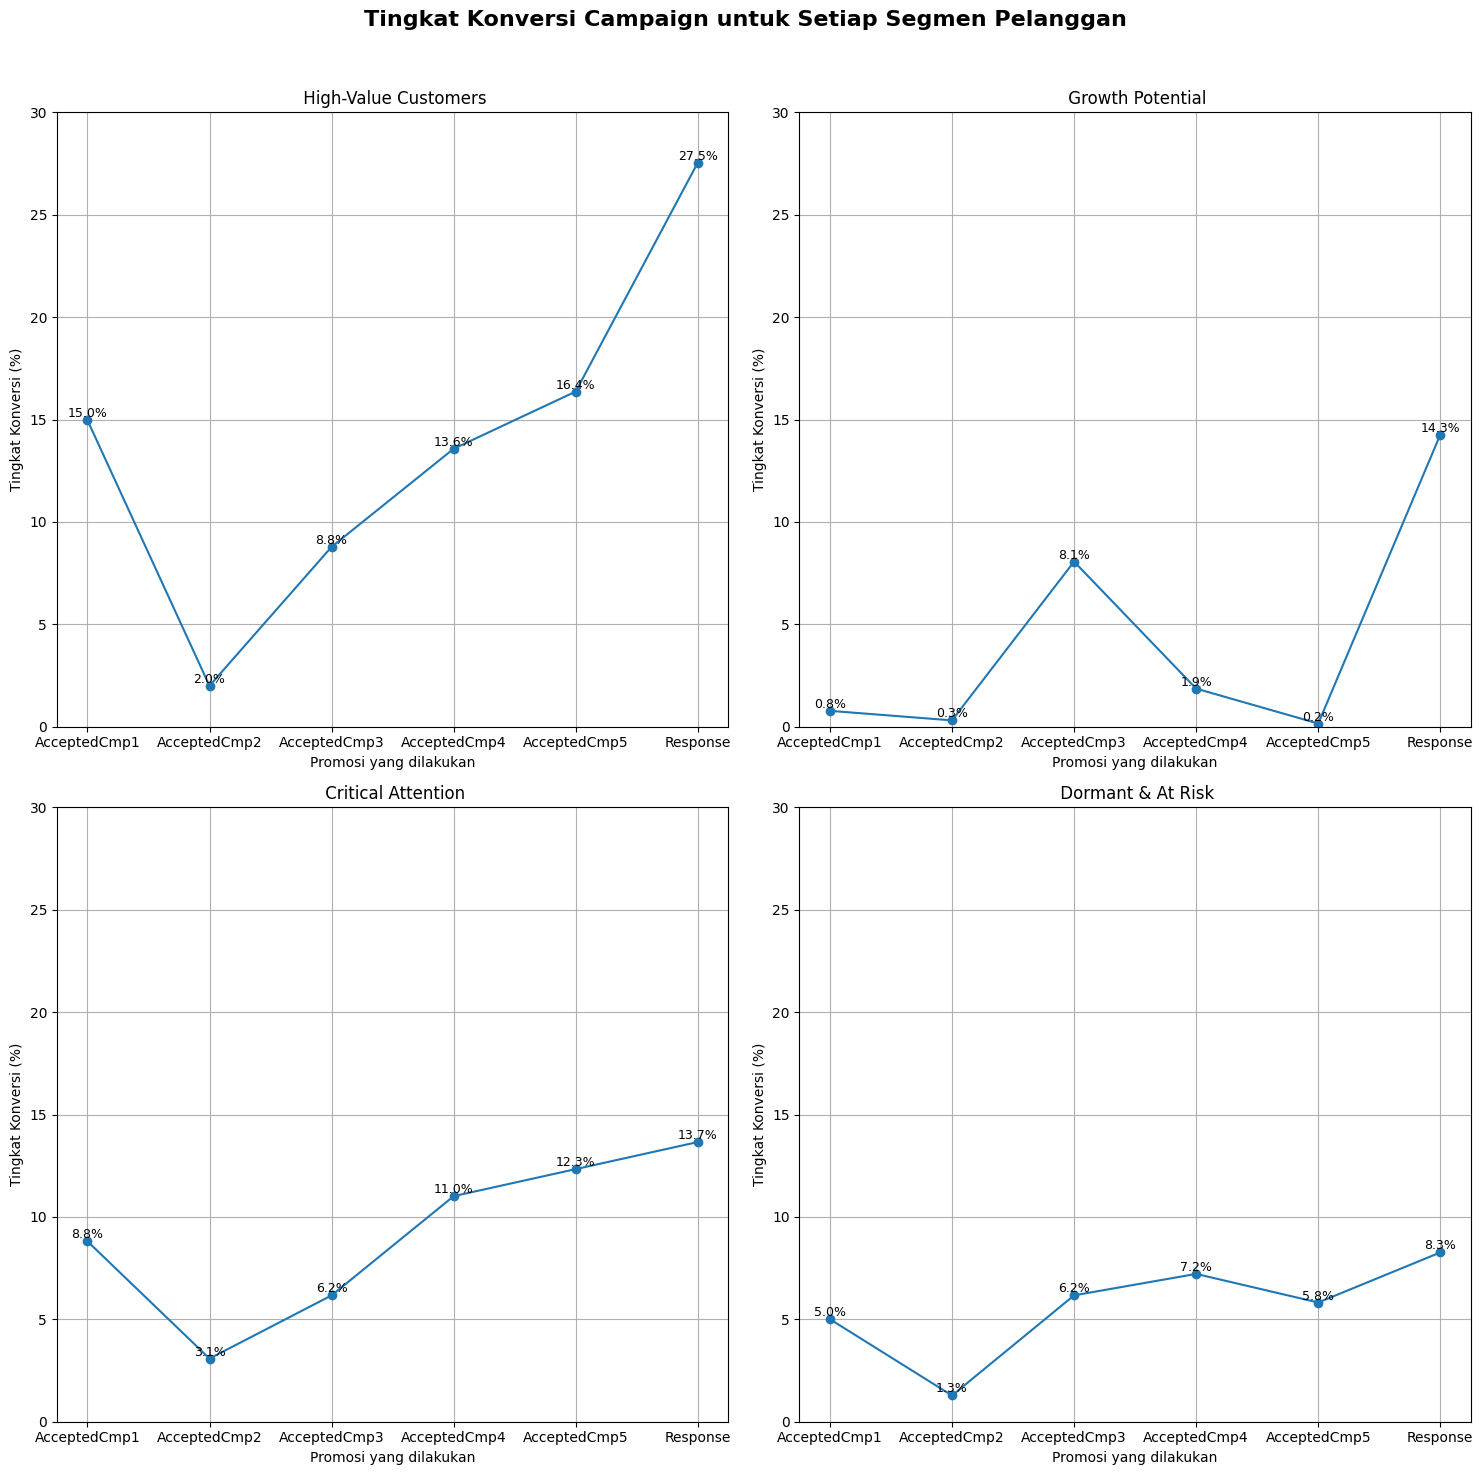

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.suptitle('Tingkat Konversi Campaign untuk Setiap Segmen Pelanggan', fontsize=16, fontweight='bold')

segments_titles = {
    "High-Value Customers": " High-Value Customers",
    "Growth Potential": " Growth Potential",
    "Critical Attention": " Critical Attention",
    "Dormant & At Risk": " Dormant & At Risk",
}

axes = axes.flatten()  # Flattening axes for easier indexing

for i, (segment, title) in enumerate(segments_titles.items()):
    ax = axes[i]  # Select corresponding subplot
    data = proportion_campaign_segment.loc[segment]  # Selecting the segment data
    data.plot(kind='line', marker='o', ax=ax)  # Plotting on the specific subplot
    ax.set_title(title)
    ax.set_xlabel('Promosi yang dilakukan')
    ax.set_ylabel('Tingkat Konversi (%)')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x*100:.0f}"))  # Show percentage
    ax.set_ylim(0, 0.30)  # Set y-axis limit to 0-35%
    ax.grid(True)
    
    for i, value in enumerate(data):
        ax.text(i, value, f"{value*100:.1f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()


`Insight`
- Promosi terakhir (AcceptedCmp6/Response) menunjukkan tingkat keberhasilan tertinggi di semua segmen, terutama pada segmen High-Value Customers yang mengalami lonjakan signifikan.
- Promosi kedua (AcceptedCmp2) menunjukkan tingkat keberhasilan sangat rendah di hampir semua segmen, mengindikasikan bahwa kampanye ini kurang relevan atau menarik bagi pelanggan.
- Promosi ketiga (AcceptedCmp3) menunjukkan kenaikan signifikan pada segmen Growth Potential, menandakan kampanye ini lebih sesuai dengan kebutuhan dan karakteristik segmen tersebut.

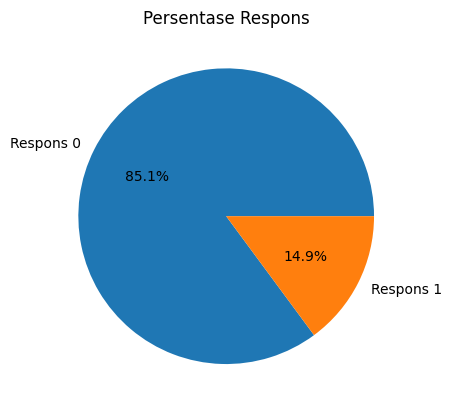

In [64]:
counts = merged_df['Response'].value_counts()

plt.pie(counts, labels=['Respons 0', 'Respons 1'], autopct='%1.1f%%')
plt.title('Persentase Respons')
plt.show()

`Insight`

- Respon Positif (14,9%):
Hanya 14,9% pelanggan dari keseluruhan segmen yang memberikan respon positif terhadap kampanye terakhir. Meskipun ini adalah kampanye dengan performa terbaik (seperti terlihat dari grafik sebelumnya), proporsi respon masih tergolong kecil dibandingkan populasi total pelanggan.

- Respon Negatif (85,1%):
Sebagian besar pelanggan (85,1%) tidak merespon kampanye terakhir. Ini mengindikasikan adanya ruang besar untuk perbaikan dalam menjangkau atau memotivasi segmen pelanggan lainnya.

# 4. Kesimpulan dan Rekomendasi 

## Segmentasi Pelanggan berbaris RFM

Segmentasi dibuat menjadi pengelompokan segment baru menjadi 4 segmentasi, yaitu : 
1. `High-Value Customers`: `Champion` dan `Loyal Customer`
- Pelanggan inti yang memberikan kontribusi besar dan konsisten terhadap pendapatan.
- Memiliki frekuensi pembelian yang tinggi dan sering merespon promosi.
	
2. `Growth Potential`: `Potential Loyalist`, `Promising`, `New Customer`
- Pelanggan yang menunjukkan potensi pertumbuhan jangka panjang jika dikelola dengan baik.
- Biasanya baru saja bergabung atau mulai menunjukkan pola pembelian reguler.

3. `Critical Attention`: `Need Attention` dan `Cannot Lose Them`
- Pelanggan ini membutuhkan perhatian langsung untuk mengembalikan loyalitas dan mencegah kehilangan mereka.
- terjadi penurunan interaksi atau pembelian.

4. `Dormant & At Risk`: `Hibernating`, `About to Sleep`,` At Risk`, `Lost`
- Pelanggan yang menunjukkan tanda-tanda ketidakaktifan atau berisiko berhenti menjadi pelanggan sepenuhnya.
- Aktivitas pembelian rendah atau tidak ada selama periode waktu tertentu.


## Hubungan antara karakteristik segmentasi pelanggan dengan Data Demografi Pelanggan untuk Meningkatkan Penjualan

Terdapat 4 profil demografi yang tepat untuk di-highlight dalam melihat profil dari segmen pelanggan potensial, yaitu generasi, tingkat pendidikan, jumlah anak, dan jumlah pendapatan. Profil demografi tersebut memperlihatkan tren atau kecenderungan yang signifikan dalam mencirikan tiap segmen pelanggan , sehingga dapat dibedakan dengan jelas. Berdasarkan analisis data demografi pelanggan, didapat kesimpulan sebagai berikut:

| Data Demografi  | High-Value Customers  | Growth Potential   | Critical Attention  |    Dormant & At Risk  |
|----------|------------|----------|------------|------------|
|Kelompok Generasi | Boomers dan Gen X | Gen X | Boomers dan Gen X | Gen X dan Boomers|
|Kelompok Income | Middle Class | Lower Class | Middle Class  | Middle dan Lower class|
|Kelompok Education| Graduation | Graduation | Graduation| Graduation|
|kelompok Child | pelanggan tanpa anak (50%) atau keluarga kecil dengan 1 anak (44%) | Memiliki seorang anak(58%) | Memiliki seorang anak (49%) | pelanggan dengan 1 anak(48%) dan tanpa anak (39%)|

## Rekomendasi produk yang ditawarkan kepada tiap segment

1. `High-Value Customers`
- **Eksklusivitas Premium**: Tawarkan paket premium yang menggabungkan anggur, daging, dan produk emas, seperti "Paket Gourmet Eksklusif."
- **Layanan Khusus**: Berikan layanan tambahan seperti pengiriman gratis, akses prioritas ke produk baru, atau undangan ke acara eksklusif (misalnya, wine tasting).

2. `Growth Potential`
- **Strategi Upselling**: Dorong pelanggan mencoba kategori anggur dengan promosi "Beli Daging, Dapatkan Diskon Anggur.
- **Kampanye Promosi**: Fokus pada manfaat produk untuk keluarga atau acara tertentu, misalnya, "Paket BBQ Akhir Pekan" yang menggabungkan daging, ikan, dan produk manis.

3. `Critical Attention`
- **Reaktivasi Pelanggan**: Tawarkan insentif, seperti voucher diskon, untuk mendorong mereka membeli kembali.
- **Paket Murah**: Sediakan bundling sederhana dengan harga terjangkau, seperti "Paket Hemat Daging & makanan Manis" untuk mendorong pembelian tambahan
- **Peningkatan Hubungan**: Kirimkan  pesan personal untuk memahami kebutuhan mereka dan mendorong mereka kembali berbelanja.

4. `Dormant & At Risk`
- **Kampanye Reaktivasi**: Kirimkan penawaran spesial, seperti diskon besar pada kategori daging atau ikan, untuk menarik kembali perhatian mereka.
- **Pendekatan Emosional**: Gunakan pesan personal seperti "Kami merindukan Anda!" disertai insentif tambahan.

## Preferensi Tempat Belanja

Berdasarkan analisis grafik, pembelian di toko fisik adalah yang tertinggi, menunjukkan ketertarikan yang kuat pada toko sebagai tempat utama transaksi. Pelanggan cenderung memilih toko fisik karena adanya pengalaman langsung dengan produk, interaksi personal dengan staf, atau kenyamanan melihat produk secara langsung sebelum membeli. Meskipun dominan, toko fisik membutuhkan lebih banyak upaya untuk menjangkau pelanggan karena keterbatasan geografis. Berikut ini beberapa rekomendasi tiap tempat belanja, yaitu:

1. Toko Fisik (offline store) 
- Buat program loyalitas yang hanya berlaku di toko fisik untuk memberikan nilai lebih kepada pelanggan. Contohnya, diskon eksklusif untuk pembelian di toko atau undangan ke acara VIP seperti peluncuran produk baru
- Ciptakan toko hybrid dengan elemen digital seperti layar sentuh interaktif yang menampilkan katalog produk atau promosi yang disesuaikan dengan profil pelanggan

2. Pembelian Sistem Online
- Tingkatkan kenyamanan dengan menyediakan opsi pengiriman cepat dan pengembalian produk yang mudah.
- Adakan kampanye diskon eksklusif untuk belanja online, terutama selama hari-hari tertentu seperti akhir pekan atau acara besar
- Tawarkan pengalaman belanja digital yang dipersonalisasi dengan bantuan chatbot atau AI untuk merekomendasikan produk berdasarkan riwayat pembelian mereka.

3. Pembelian melalui Katalog
- Kombinasikan katalog dengan strategi loyalitas, seperti memberikan diskon tambahan untuk pembelian melalui katalog.

Integrasikan seluruh saluran penjualan (fisik, online, dan katalog) untuk menciptakan pengalaman belanja yang efektif dan efisien. 


Dengan pendekatan ini, bisnis tidak hanya akan meningkatkan loyalitas pelanggan tetapi juga menciptakan pengalaman belanja yang unik dan tak terlupakan. Inovasi ini dapat menjadi pembeda signifikan untuk mendominasi pasar dan memperkuat hubungan dengan pelanggan

## Efektivitas kampanye kepada setiap segment

Kampanye promosi ke-6 berhasil mencuri perhatian dengan tingkat keberhasilan tertinggi di seluruh segmen pelanggan selama dua tahun terakhir. Sebaliknya, kampanye promosi ke-2 justru menunjukkan performa yang mengecewakan, dengan tingkat keberhasilan yang sangat rendah di hampir semua segmen. Fenomena ini mengundang perhatian lebih untuk mengevaluasi strategi, taktik, dan faktor eksternal yang mungkin memengaruhi hasilnya. Mengapa kampanye ke-6 begitu efektif, sementara kampanye ke-2 gagal memenuhi ekspektasi? Ini menjadi tantangan penting untuk diperbaiki dan dioptimalkan di masa depan.

|High-Value Customers  | Growth Potential   | Critical Attention  |    Dormant & At Risk  |
|------------|----------|------------|------------|
|Kombinasi kampanye 1, 5, dan 6 dapat digunakan untuk mempertahankan keterlibatan mereka. Tawarkan manfaat eksklusif seperti program loyalitas atau penawaran premium yang sesuai dengan preferensi mereka.| Fokuskan kombinasi kampanye 3 dan 6 untuk menarik perhatian mereka. Tekankan produk atau layanan yang relevan dengan kebutuhan mereka|Gabungkan kampanye 4, 5, dan 6 untuk memperbaiki hubungan. Berikan insentif tambahan seperti kompensasi, layanan pelanggan yang lebih baik, atau penawaran eksklusif untuk membangun kembali kepercayaan.|Kampanye 6 telah terbukti efektif untuk menarik kembali perhatian mereka. Gunakan promosi berbasis urgensi seperti diskon besar dengan batas waktu tertentu atau undangan untuk kembali dengan manfaat tambahan.|

Berdasarkan analisis grafik respon, Kampanye Promosi 6, meskipun memiliki tingkat keberhasilan tertinggi dibandingkan kampanye lainnya, hanya berhasil mendapatkan respons positif dari 14,9% pelanggan. Hal ini mengindikasikan dua hal penting terkait efektivitas kampanye tersebut:

- Keberhasilan Kampanye pada Segmen Tertentu: Kampanye 6 terbukti efektif dalam menjangkau pelanggan di segmen tertentu, seperti Pelanggan (High-Value Customers) dan (Growth Potential), Sebagaimana terlihat dari peningkatan partisipasi pada kelompok ini. Namun, keberhasilan ini belum meluas secara merata ke seluruh populasi pelanggan, termasuk segmen Pelanggan Tidak Aktif dan Berisiko (Dormant & At-Risk) atau Segmen (Critical Attention).

- Potensi Perbaikan Strategi: Dengan 85,1% pelanggan yang tidak merespons kampanye ini, terdapat peluang besar untuk mengevaluasi kembali pendekatan kampanye, terutama pada segmen dengan respons rendah. Misalnya, strategi yang lebih personal atau penawaran yang lebih relevan dengan kebutuhan dan preferensi segmen Dormant & At-Risk dapat meningkatkan keterlibatan mereka.